In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
spy = pd.read_csv('./spy.csv')
gme = pd.read_csv('./gme.csv')

#### Linear Separability

##### SPY Linear Separability

In [3]:
spy_labels = pd.read_csv('./spy_labels.csv',header=None)
spy_labels.columns=['Label','date']
spy_labels.drop(columns='date',inplace=True)
columns = ['Year','Year_Week','Week_Number','Day', 'Weekday','Open','Adj Close',
           'Return','Month']
spy = spy[columns]
spy45 = spy[(spy.Year==2020)|(spy.Year==2021)]
dict_labs = dict(zip(spy45.Year_Week.unique(),spy_labels.Label))
spy45 = spy45.assign(Label=[dict_labs[y_w] for y_w in spy45.Year_Week])

In [4]:
spy_weekly_return = pd.read_csv('./spy_weekly_return_volatility.csv')
y = spy_weekly_return.Year
spy_wr = spy_weekly_return[np.where((y==2020)|(y==2021),True,False)]
spy_wr['Label']=[v for val in spy_labels.values for v in val]
spy_wr

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_25863/585712261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_wr['Label']=[v for val in spy_labels.values for v in val]


,Year,Week_Number,mean_return,volatility,Label
158,2020,0,0.08900,1.196425,Red
159,2020,1,0.20460,0.458676,Green
160,2020,2,0.38100,0.390725,Green
161,2020,3,-0.23950,0.451909,Red
162,2020,4,-0.42580,1.242151,Red
...,...,...,...,...,...
258,2021,48,-0.23360,1.529530,Red
259,2021,49,0.75660,1.028056,Green
260,2021,50,-0.39140,1.100609,Red
261,2021,51,0.58375,1.198328,Green


In [5]:
spy_wr_2020 = spy_wr.query('Year == 2020')
spy_wr_2021 = spy_wr.query('Year == 2021')

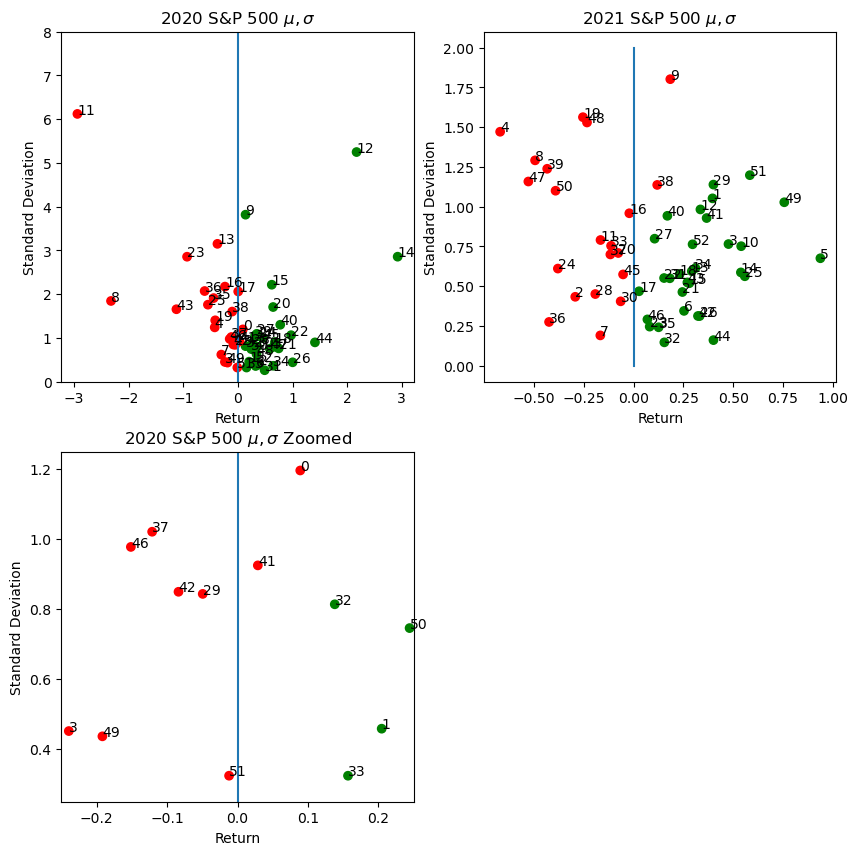

In [6]:

# for i in range(0,53):
#     plt.annotate(spy_wr.iloc[i,1],(spy_wr.iloc[i,2],spy_wr.iloc[i,3]),rotation=0)
# plt.xlabel("Return");plt.ylabel('Standard Deviation');
# plt.title('2020 S&P 500 Weekly Return, Standard Deviation, and Label')
# plt.savefig('./spy_2020_R_SD')
fig = plt.figure(1,figsize=(10,10))
plt.subplot(221)
plt.scatter(data=spy_wr_2020, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,23])
for i in range(0,53):
    plt.annotate(spy_wr.iloc[i,1],(spy_wr.iloc[i,2],spy_wr.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2020 S&P 500 $\mu, \sigma$')
plt.savefig('./spy_2020_R_SD')
plt.ylim(0,8)

plt.subplot(222)
plt.scatter(data=spy_wr_2021, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,2])
for i in range(0,52):
    plt.annotate(spy_wr_2021.iloc[i,1],
                 (spy_wr_2021.iloc[i,2],spy_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2021 S&P 500 $\mu, \sigma$')
# plt.ylim(0,5)
plt.savefig('./spy_2021')
plt.subplot(223)
plt.scatter(data=spy_wr_2020, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,13])
for i in range(0,53):
    plt.annotate(spy_wr_2020.iloc[i,1],
                 (spy_wr_2020.iloc[i,2],spy_wr_2020.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2020 S&P 500 $\mu, \sigma$ Zoomed')
plt.xlim(-.25,.25)
plt.ylim(.25,1.25)
plt.savefig('./spy_2020_zoomed')

In [7]:
# fig = plt.figure(1,figsize=(10,10))
# plt.subplot(111)
# plt.scatter(data=spy_wr_2020, x='mean_return', y='volatility',c='Label')
# plt.plot([0,0],[0,23])
# for i in range(0,53):
#     plt.annotate(spy_wr.iloc[i,1],(spy_wr.iloc[i,2],spy_wr.iloc[i,3]),rotation=0)
# plt.xlabel("Return");plt.ylabel('Standard Deviation');
# plt.title(f'2020 GameStop $\mu, \sigma$')
# plt.savefig('./spy_2020_R_SD_superzoom.png')
# plt.ylim(2,6)
# plt.xlim(-.5,2.5)

In [8]:
len(spy_wr_2020)

53

In [9]:
spy_labels_rem = spy_labels.copy(deep=True)

In [10]:
ignore_weeks = [0,41]

In [11]:
ignore_weeks_2020 = np.array(ignore_weeks)+158

In [12]:
spy_wr_2020_rem = spy_wr_2020.drop(ignore_weeks_2020,axis=0).copy(deep=True)

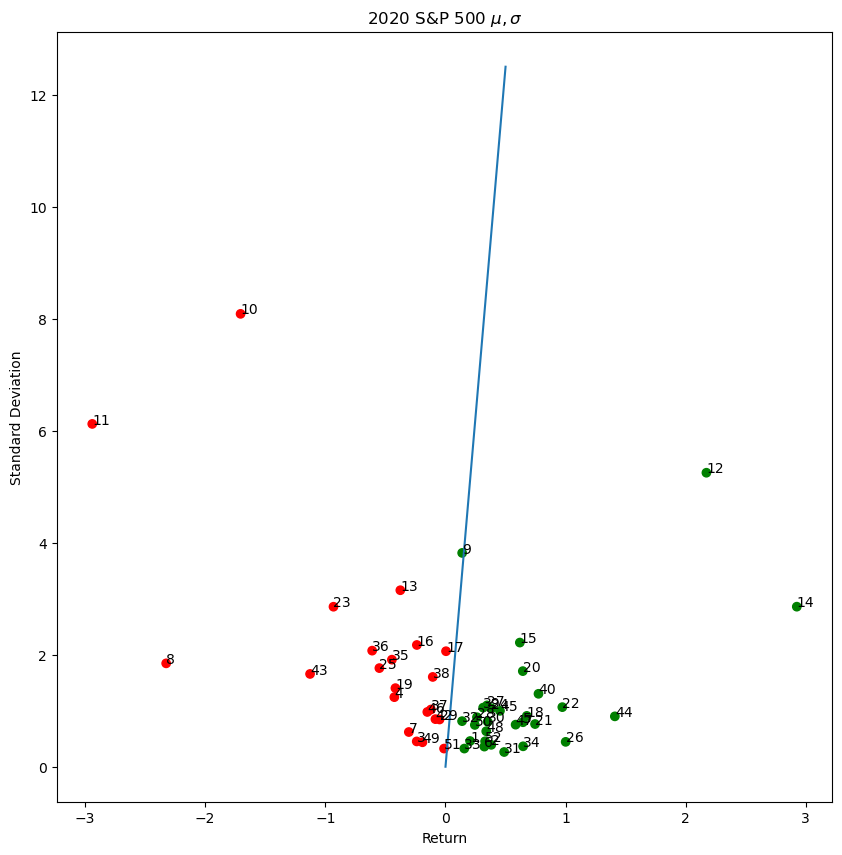

In [13]:
fig = plt.figure(1,figsize=(10,10))
plt.subplot(111)
plt.scatter(data=spy_wr_2020_rem, x='mean_return', y='volatility',c='Label')
plt.plot([0,.5],[0,12.5])
for i in range(0,53):
    if i not in ignore_weeks:
        plt.annotate(spy_wr.iloc[i,1],(spy_wr.iloc[i,2],spy_wr.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2020 S&P 500 $\mu, \sigma$')
plt.savefig('./spy_2020_R_SD_line.png')
# plt.ylim(0,25)
# plt.xlim(-15,15)

I'm choosing the line y = 0 + 25\*r to differentiate between red and green points.

In [14]:
spy_wr_2021_linear_discriminator = spy_wr_2021.copy(deep=True)

In [15]:
def red_green(mus,sigmas,a,b):
    '''take return,vol df and assign labels based on line coeffs'''
    labels = []
    for mu, sigma in zip(mus,sigmas):
        if sigma>=(a + b*mu):
            labels.append('Red')
        else:
            labels.append('Green')
    return labels

In [16]:
spy_2021_new_labels = red_green(spy_wr_2021.mean_return,spy_wr_2021.volatility,0,25)

In [17]:
spy_wr_2021_nl = spy_wr_2021.copy(deep=True)
spy_wr_2021_nl['Label'] = spy_2021_new_labels

(-1.0, 1.0)

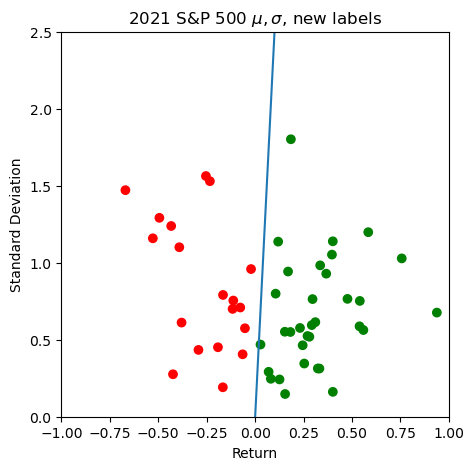

In [18]:
fig = plt.figure(1,figsize=(5,5))
plt.subplot(111)
plt.scatter(data=spy_wr_2021_nl, x='mean_return', y='volatility',c='Label')
plt.plot([0,2],[0,50])
# for i in range(0,52):
#         plt.annotate(spy_wr_2021_nl.iloc[i,1],(spy_wr_2021_nl.iloc[i,2],spy_wr_2021_nl.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2021 S&P 500 $\mu, \sigma$, new labels')
plt.savefig('./spy_2021_new_labels.png')
plt.ylim(0,2.5)
plt.xlim(-1,1)

In [19]:
def buy_and_hold(stock):
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Open'].values.astype(float))[0]

In [20]:
def trade_from_open_close(stock):
    '''Return a dataframe with weekly return factors based on first day of week
    open and last day of week close'''
    stock_by_week = pd.DataFrame(
        columns=['Year','Week_Number',"Open","Adj Close", 'Return', "Label"])
    y = stock.Year.unique()[0]
    
    for inx, week_num in enumerate(stock["Week_Number"].unique()):
        this_week = stock[stock["Week_Number"]==week_num]
        o = this_week.head(1)['Open'].values[0]
        ac = this_week.tail(1)['Adj Close'].values[0]
        r = 1+(ac-o)/o
        l = this_week.head(1)['Label'].values[0]
        stock_by_week.loc[inx,:] = [y,week_num,o,ac,r,l]
    return stock_by_week

In [21]:
def buy_hold_weekly(stock):
    tail_ac = []
    head_open = []
    for wk in sorted(stock['Week_Number'].unique()):
        o = stock[stock["Week_Number"] == \
                              wk].head(1)['Open'].values[0]
        head_open.append(o)
        ac = stock[stock["Week_Number"] == \
                              wk].tail(1)['Adj Close'].values[0]
        tail_ac.append(ac)
    r = np.array(tail_ac)/np.array(head_open)
    return r

In [22]:
spy2021 = spy.query('Year == 2021')

In [23]:
dict_labs = dict(zip(spy2021.Year_Week.unique(),spy_2021_new_labels))
spy2021 = spy2021.assign(Label=[dict_labs[y_w] for y_w in spy2021.Year_Week])

In [24]:
spy_sbw = trade_from_open_close(spy2021) # stock by week

Cumulative returns: Buy open, Sell Close, Trade Green.  138.15x return

In [25]:
labels = spy_sbw.Label
returns = spy_sbw.Return
trade_green = np.round(100*np.cumprod(np.where(labels=='Green',
                             returns.values.astype(float),1)),2)
trade_all_weeks = np.round(100*np.cumprod(returns.values.astype(float)),2)
bh_weekly = np.round(100*np.cumprod(buy_hold_weekly(spy2021)),2)
trade_green,trade_all_weeks,bh_weekly,buy_and_hold(spy2021)

(array([97.56, 97.56, 94.83, 94.83, 94.49, 91.53, 91.53, 91.53, 87.46,
        86.06, 86.06, 84.19, 82.4 , 80.98, 79.24, 79.24, 76.33, 74.02,
        74.02, 74.02, 71.79, 69.18, 66.93, 66.93, 66.23, 65.01, 63.1 ,
        63.1 , 62.97, 62.97, 61.17, 59.59, 59.59, 58.27, 56.6 , 56.6 ,
        56.6 , 56.03, 56.03, 54.95, 54.35, 53.8 , 52.75, 52.07, 52.07,
        50.52, 50.52, 50.52, 50.57, 50.57, 50.96, 50.03]),
 array([97.56, 93.17, 90.56, 83.89, 83.59, 80.98, 77.  , 72.67, 69.44,
        68.32, 65.02, 63.61, 62.26, 61.19, 59.88, 57.76, 55.64, 53.96,
        51.26, 49.34, 47.85, 46.11, 44.62, 42.17, 41.72, 40.95, 39.75,
        38.07, 37.99, 36.66, 35.61, 34.69, 33.45, 32.71, 31.77, 30.22,
        28.83, 28.54, 27.15, 26.62, 26.33, 26.07, 25.56, 25.23, 24.34,
        23.62, 22.33, 21.16, 21.17, 20.16, 20.31, 19.94]),
 array([97.56, 93.17, 90.56, 83.89, 83.59, 80.98, 77.  , 72.67, 69.44,
        68.32, 65.02, 63.61, 62.26, 61.19, 59.88, 57.76, 55.64, 53.96,
        51.26, 49.34, 47.85, 4

Due to calculation of retuns from open to close, since adjusted close for spy are consistently skewed downwards, there is a compounding skew in the cumulative returns. From above, a \\$100 portfolio kept in the market on green weeks would deteriorate to \\$50.03, while a portfolio that trades on all weeks would deteriorate to $19.94.  Meanwhile, a simple buy and hold approach that does not miss weekend trading would accumulate to \\$123.47, which highlights the importance here of being invested between the Friday close and the Monday open.

In [26]:
def buy_hold_weekly(stock):
    tail_ac = []
    o = stock.head(1)['Open'].values[0]
    for wk in sorted(stock['Week_Number'].unique()):
        ac = stock[stock["Week_Number"] == \
                              wk].tail(1)['Adj Close'].values[0]
        tail_ac.append(ac)
    r = np.array(tail_ac)/o
    return r

In [27]:
buy_hold_weekly(spy2021)

array([0.9756468 , 0.96141856, 0.97980336, 0.94703045, 0.99216648,
       1.00476939, 0.99810823, 0.97335536, 0.98172178, 1.00841971,
       0.99994671, 1.0166529 , 1.02853641, 1.05645999, 1.07127441,
       1.06994218, 1.07138099, 1.08377075, 1.06954251, 1.06533266,
       1.07841518, 1.0849964 , 1.08939277, 1.06876982, 1.09887826,
       1.11718313, 1.1218193 , 1.11105486, 1.13319656, 1.1295196 ,
       1.13977778, 1.14859716, 1.14201593, 1.15976126, 1.1670619 ,
       1.14737151, 1.14060377, 1.14710506, 1.12211239, 1.13146466,
       1.15216754, 1.17089872, 1.18672564, 1.21070582, 1.20745517,
       1.21163838, 1.18600623, 1.17167142, 1.21643441, 1.19250753,
       1.22032453, 1.23473928])

In [28]:
bh_weekly = np.round(100*buy_hold_weekly(spy2021),2)
bh_weekly

array([ 97.56,  96.14,  97.98,  94.7 ,  99.22, 100.48,  99.81,  97.34,
        98.17, 100.84,  99.99, 101.67, 102.85, 105.65, 107.13, 106.99,
       107.14, 108.38, 106.95, 106.53, 107.84, 108.5 , 108.94, 106.88,
       109.89, 111.72, 112.18, 111.11, 113.32, 112.95, 113.98, 114.86,
       114.2 , 115.98, 116.71, 114.74, 114.06, 114.71, 112.21, 113.15,
       115.22, 117.09, 118.67, 121.07, 120.75, 121.16, 118.6 , 117.17,
       121.64, 119.25, 122.03, 123.47])

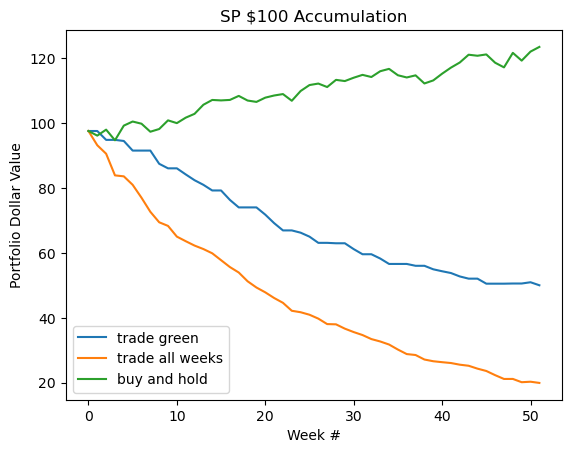

In [29]:
plt.plot(range(len(trade_green)),trade_green,
        range(len(trade_all_weeks)),trade_all_weeks,
        range(len(bh_weekly)),bh_weekly)
plt.legend(['trade green','trade all weeks','buy and hold'])
plt.xlabel('Week #')
plt.ylabel('Portfolio Dollar Value')
plt.title('SP $100 Accumulation')
plt.savefig('./spy_100_accumulation.jpg')

Note:  Latter analysis for this pset will calculate returns from adj close to adj close.

##### GME Linear separability

In [30]:
gme = pd.read_csv('./gme.csv')
gme_labels = pd.read_csv('./gme_labels.csv',header=None)
gme_labels.columns=['Label','date']
gme_labels.drop(columns='date',inplace=True)
columns = ['Year','Year_Week','Week_Number','Day', 'Weekday','Open','Adj Close',
           'Return','Month']
gme = gme[columns]
gme45 = gme[(gme.Year==2020)|(gme.Year==2021)]
dict_labs = dict(zip(gme45.Year_Week.unique(),gme_labels.Label))
gme45 = gme45.assign(Label=[dict_labs[y_w] for y_w in gme45.Year_Week])

In [31]:
gme_weekly_return = pd.read_csv('./gme_weekly_return_volatility.csv')
y = gme_weekly_return.Year
gme_wr = gme_weekly_return[np.where((y==2020)|(y==2021),True,False)]
gme_wr['Label']=[v for val in gme_labels.values for v in val]
gme_wr

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_25863/2628832985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme_wr['Label']=[v for val in gme_labels.values for v in val]


,Year,Week_Number,mean_return,volatility,Label
158,2020,0,-1.5160,7.493918,Red
159,2020,1,-1.5324,3.426839,Red
160,2020,2,-2.4704,6.280646,Red
161,2020,3,-2.3000,3.391904,Red
162,2020,4,-2.3190,1.496155,Red
...,...,...,...,...,...
258,2021,48,-2.8324,4.045923,Red
259,2021,49,-1.4430,6.241354,Red
260,2021,50,-0.0922,8.972470,Red
261,2021,51,-0.5565,1.666374,Red


In [32]:
gme_wr_2020 = gme_wr.query('Year == 2020')
gme_wr_2021 = gme_wr.query('Year == 2021')

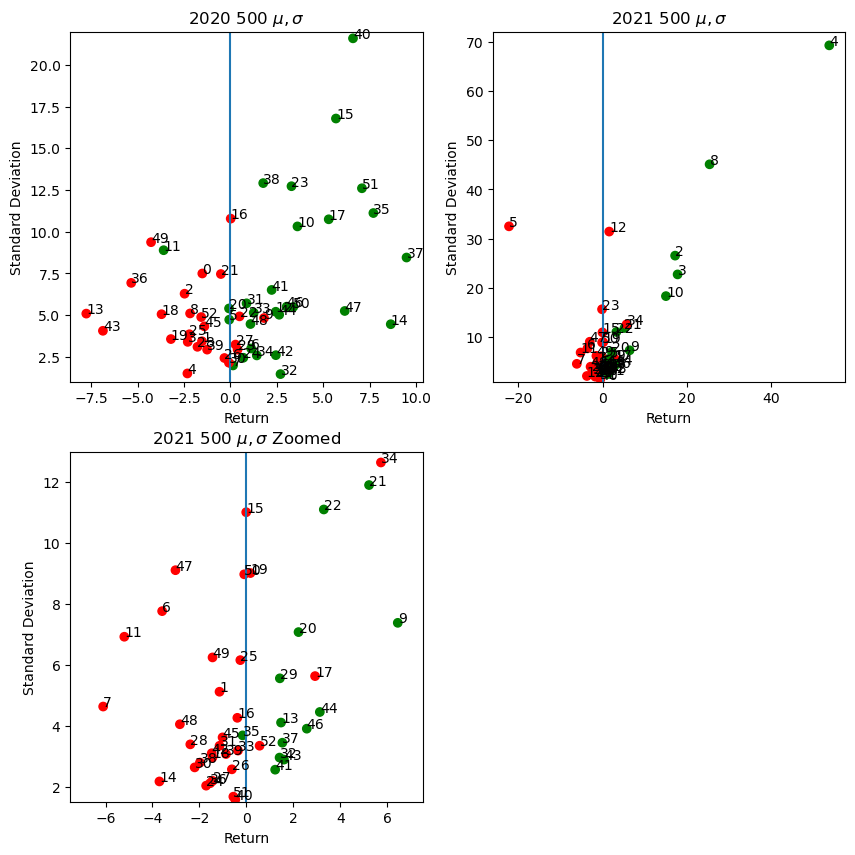

In [33]:

# for i in range(0,53):
#     plt.annotate(gme_wr.iloc[i,1],(gme_wr.iloc[i,2],gme_wr.iloc[i,3]),rotation=0)
# plt.xlabel("Return");plt.ylabel('Standard Deviation');
# plt.title('2020 500 Weekly Return, Standard Deviation, and Label')
# plt.savefig('./gme_2020_R_SD')
fig = plt.figure(1,figsize=(10,10))
plt.subplot(221)
plt.scatter(data=gme_wr_2020, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,23])
for i in range(0,53):
    plt.annotate(gme_wr.iloc[i,1],(gme_wr.iloc[i,2],gme_wr.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2020 500 $\mu, \sigma$')
plt.savefig('./gme_2020_R_SD')
plt.ylim(1,22)

plt.subplot(222)
plt.scatter(data=gme_wr_2021, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,72])
for i in range(0,52):
    plt.annotate(gme_wr_2021.iloc[i,1],
                 (gme_wr_2021.iloc[i,2],gme_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2021 500 $\mu, \sigma$')
plt.ylim(1,72)
plt.savefig('./gme_2021_R_SD_Broad_View')
plt.subplot(223)
plt.scatter(data=gme_wr_2021, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,13])
for i in range(0,52):
    plt.annotate(gme_wr_2021.iloc[i,1],
                 (gme_wr_2021.iloc[i,2],gme_wr_2021.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title('2021 500 $\mu, \sigma$ Zoomed')
plt.xlim(-7.5,7.5)
plt.ylim(1.5,13)
plt.savefig('./gme_plot')

(-0.5, 2.5)

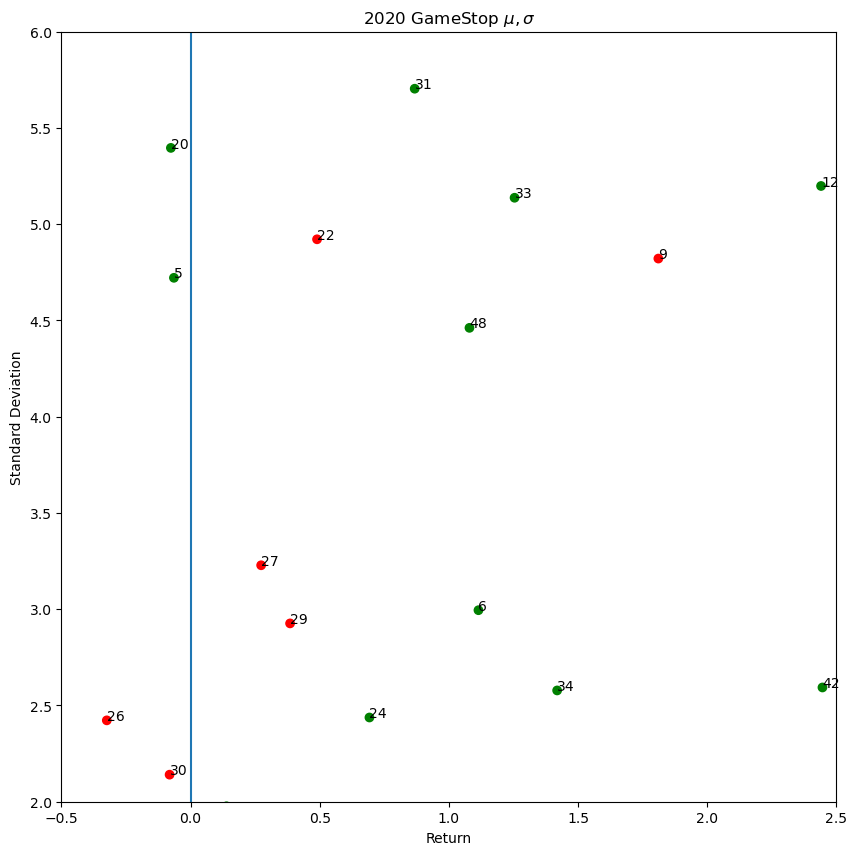

In [34]:
fig = plt.figure(1,figsize=(10,10))
plt.subplot(111)
plt.scatter(data=gme_wr_2020, x='mean_return', y='volatility',c='Label')
plt.plot([0,0],[0,23])
for i in range(0,53):
    plt.annotate(gme_wr.iloc[i,1],(gme_wr.iloc[i,2],gme_wr.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2020 GameStop $\mu, \sigma$')
plt.savefig('./gme_2020_R_SD_superzoom.png')
plt.ylim(2,6)
plt.xlim(-.5,2.5)

In [35]:
len(gme_wr_2020)

53

In [36]:
gme_labels_rem = gme_labels.copy(deep=True)

In [37]:
ignore_weeks = [5,20,27,29,22,9,11,16,7]

In [38]:
ignore_weeks_2020 = np.array(ignore_weeks)+158

In [39]:
gme_wr_2020_rem = gme_wr_2020.drop(ignore_weeks_2020,axis=0).copy(deep=True)

(-15.0, 15.0)

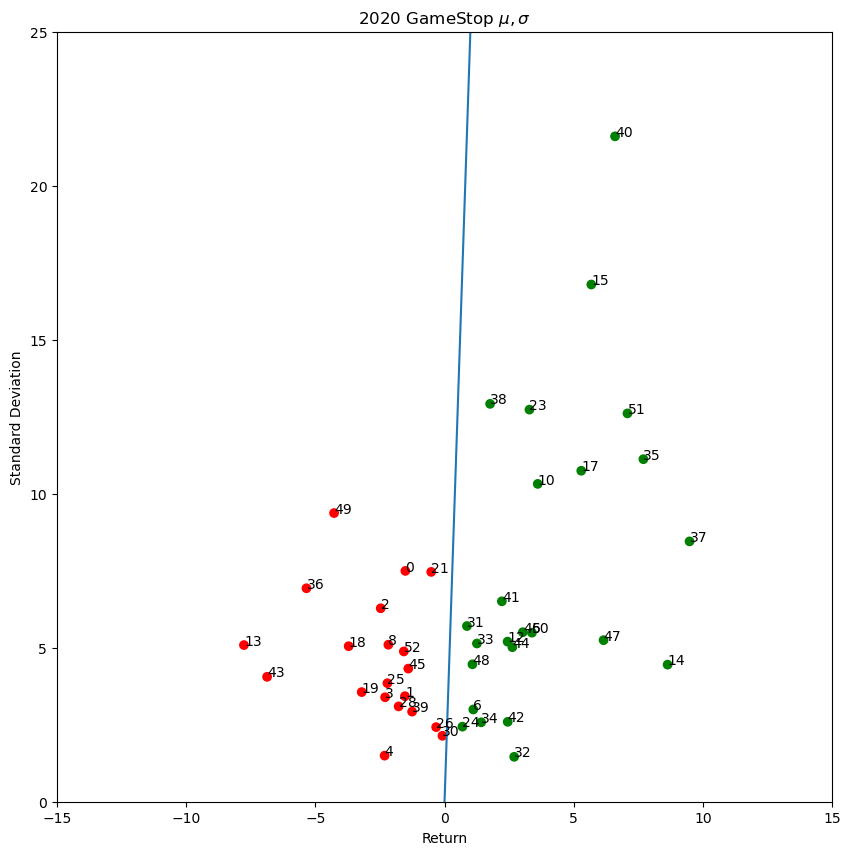

In [40]:
fig = plt.figure(1,figsize=(10,10))
plt.subplot(111)
plt.scatter(data=gme_wr_2020_rem, x='mean_return', y='volatility',c='Label')
plt.plot([0,1],[0,25])
for i in range(0,53):
    if i not in ignore_weeks:
        plt.annotate(gme_wr.iloc[i,1],(gme_wr.iloc[i,2],gme_wr.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2020 GameStop $\mu, \sigma$')
plt.savefig('./gme_2020_R_SD_superzoom.png')
plt.ylim(0,25)
plt.xlim(-15,15)

I'm choosing the line y = 0 + 25\*r to differentiate between red and green points.

In [41]:
gme_wr_2021_linear_discriminator = gme_wr_2021.copy(deep=True)

In [42]:
def red_green(mus,sigmas,a,b):
    '''take return,vol df and assign labels based on line coeffs'''
    labels = []
    for mu, sigma in zip(mus,sigmas):
        if sigma>=(a + b*mu):
            labels.append('Red')
        else:
            labels.append('Green')
    return labels

In [43]:
gme_2021_new_labels = red_green(gme_wr_2021.mean_return,gme_wr_2021.volatility,0,25)

In [44]:
gme_wr_2021_nl = gme_wr_2021.copy(deep=True)
gme_wr_2021_nl['Label'] = gme_2021_new_labels

(-25.0, 30.0)

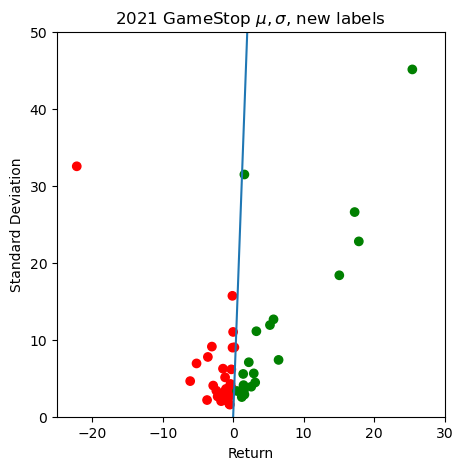

In [45]:
fig = plt.figure(1,figsize=(5,5))
plt.subplot(111)
plt.scatter(data=gme_wr_2021_nl, x='mean_return', y='volatility',c='Label')
plt.plot([0,2],[0,50])
# for i in range(0,52):
#         plt.annotate(gme_wr_2021_nl.iloc[i,1],(gme_wr_2021_nl.iloc[i,2],gme_wr_2021_nl.iloc[i,3]),rotation=0)
plt.xlabel("Return");plt.ylabel('Standard Deviation');
plt.title(f'2021 GameStop $\mu, \sigma$, new labels')
plt.savefig('./gme_2021_new_labels.png')
plt.ylim(0,50)
plt.xlim(-25,30)

In [46]:
def buy_and_hold(stock):
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Open'].values.astype(float))[0]

In [47]:
def trade_from_open_close(stock):
    '''Return a dataframe with weekly return factors based on first day of week
    open and last day of week close'''
    stock_by_week = pd.DataFrame(
        columns=['Year','Week_Number',"Open","Adj Close", 'Return', "Label"])
    y = stock.Year.unique()[0]
    
    for inx, week_num in enumerate(stock["Week_Number"].unique()):
        this_week = stock[stock["Week_Number"]==week_num]
        o = this_week.head(1)['Open'].values[0]
        ac = this_week.tail(1)['Adj Close'].values[0]
        r = 1+(ac-o)/o
        l = this_week.head(1)['Label'].values[0]
        stock_by_week.loc[inx,:] = [y,week_num,o,ac,r,l]
    return stock_by_week

In [48]:
def buy_hold_weekly(stock):
    tail_ac = []
    o = stock.head(1)['Open']
    for wk in sorted(stock['Week_Number'].unique()):
        ac = stock[stock["Week_Number"] == \
                              wk].tail(1)['Adj Close'].values[0]
        tail_ac.append(ac)
    r = np.array(tail_ac)/o.values[0]
    return r

In [49]:
gme2021 = gme.query('Year == 2021')

In [50]:
dict_labs = dict(zip(gme2021.Year_Week.unique(),gme_2021_new_labels))
gme2021 = gme2021.assign(Label=[dict_labs[y_w] for y_w in gme2021.Year_Week])

In [51]:
gme_sbw = trade_from_open_close(gme2021) # stock by week

Cumulative returns: Buy open, Sell Close, Trade Green.  138.15x return

In [52]:
labels = gme_sbw.Label
returns = gme_sbw.Return
trade_green = np.round(100*np.cumprod(np.where(labels=='Green',
                             returns.values.astype(float),1)),2)
trade_all_weeks = np.round(100*np.cumprod(returns.values.astype(float)),2)
bh_weekly = np.round(100*buy_hold_weekly(gme2021),2)
trade_green,trade_all_weeks,bh_weekly,buy_and_hold(gme2021)

(array([  100.  ,   183.09,   286.36,   962.22,   962.22,   962.22,
          962.22,  2096.77,  2762.54,  4717.44,  4717.44,  4160.29,
         4406.09,  4406.09,  4406.09,  4406.09,  5066.89,  5066.89,
         5066.89,  5604.52,  7075.77,  7526.72,  7526.72,  7526.72,
         7526.72,  7526.72,  7526.72,  7526.72,  8312.02,  8312.02,
         8312.02,  8899.  ,  8899.  , 11231.16, 11231.16, 11231.16,
        11880.36, 11880.36, 11880.36, 11880.36, 12586.31, 12586.31,
        13635.42, 15930.4 , 15930.4 , 17877.55, 17877.55, 17877.55,
        17877.55, 17877.55, 17877.55, 18268.03]),
 array([ 93.05, 170.37, 266.46, 895.37, 180.34, 130.52, 100.67, 219.37,
        289.02, 493.55, 356.18, 314.12, 332.68, 308.08, 301.38, 265.17,
        304.94, 276.83, 274.43, 303.55, 383.24, 407.66, 368.66, 333.37,
        321.94, 309.13, 289.8 , 255.94, 282.65, 252.5 , 236.54, 253.24,
        250.6 , 316.27, 312.81, 288.79, 305.48, 282.82, 269.13, 264.11,
        279.8 , 259.68, 281.32, 328.67, 312.65

In [53]:
bh_weekly = np.round(100*buy_hold_weekly(gme2021),2)
bh_weekly

array([  93.05,  186.95,  342.11, 1710.53,  335.58,  275.79,  213.68,
        535.37,  725.05, 1392.  , 1054.11,  952.63, 1007.58,  833.47,
        814.11,  795.58,  913.68,  848.  ,  841.68,  930.53, 1168.42,
       1307.16, 1228.  , 1125.47, 1102.74, 1067.58, 1006.53,  889.68,
        949.26,  848.  ,  798.74,  855.37,  838.53, 1078.74, 1067.16,
       1002.11, 1078.74,  974.53,  931.16,  908.84,  964.63,  893.68,
        965.89, 1122.32, 1063.79, 1204.21, 1051.16,  907.37,  836.84,
        819.16,  800.63,  817.47])

From above, a \\$100 portfolio kept in the market on green weeks would accumulate to \\$13,814.94, while a portfolio that trades on all weeks would accumulate to $242.24.  Meanwhile, a simple buy and hold approach that does not miss weekend trading would accumulate to \\$817.47, which highlights the importance here of being invested between the Friday close and the Monday open.

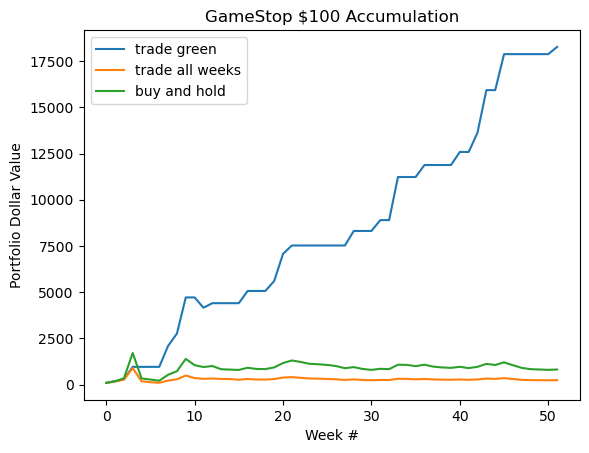

In [54]:
plt.plot(range(len(trade_green)),trade_green,
        range(len(trade_all_weeks)),trade_all_weeks,
        range(len(bh_weekly)),bh_weekly)
plt.legend(['trade green','trade all weeks','buy and hold'])
plt.xlabel('Week #')
plt.ylabel('Portfolio Dollar Value')
plt.title('GameStop $100 Accumulation')
plt.savefig('./gme_100_accumulation.jpg')

## Statistical Oracle

### GME

Questions:

1. If you buy a stock for just one week, what is the best and worst week (on the average) of the month to do so? Re- call that Weekly returns would always mean returns from ’Friday” close price to next Friday’s ”close” price.

2. What is the best and worst month to be invested in your stock and in S&P-500? Should you take a break from in- vesting in the summer months?

3. comparison of returns if you have an ”oracle” that can sta- tistically predict the future behavior of your stock price for next week



##### Question 1

##### 1. for each of the five years, compute the mean and standard deviation for the sets R, R− and R+ of weekly returns for your stock for each week of the month

First I need to generate new weekly labels so that the week with the first Friday of the month is Week 1 for each month, etc.

In [55]:
gme_week_number_labeling = gme.copy(deep=True)

In [56]:
gme_week_number_labeling

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month
0,2017,2017-01,1,3,Tuesday,6.36,5.16,0.000000,1
1,2017,2017-01,1,4,Wednesday,6.39,5.27,0.021679,1
2,2017,2017-01,1,5,Thursday,6.39,5.08,-0.035494,1
3,2017,2017-01,1,6,Friday,6.29,4.99,-0.019200,1
4,2017,2017-02,2,9,Monday,6.15,4.98,-0.001224,1
...,...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,38.50,38.03,-0.012078,12
1254,2021,2021-52,52,27,Monday,38.00,37.08,-0.025174,12
1255,2021,2021-52,52,28,Tuesday,36.88,36.62,-0.012474,12
1256,2021,2021-52,52,29,Wednesday,36.96,38.48,0.051004,12


idea: code each trading day with 

In [57]:
gme_week_number_labeling['Friday'] = np.where(gme.Weekday=='Friday',1,0)
# gme_week_number_labeling["Year_Month"] = gme_week_number_labeling['Year'].str +'-'+\
#                                          gme_week_number_labeling['Friday']       

In [58]:
gme_week_number_labeling["Friday"] = np.where(gme.Weekday == 'Friday',1,0) 
gme_week_number_labeling["Friday"]

0       0
1       0
2       0
3       1
4       0
       ..
1253    0
1254    0
1255    0
1256    0
1257    0
Name: Friday, Length: 1258, dtype: int64

In [59]:
gme_week_number_labeling

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,6.36,5.16,0.000000,1,0
1,2017,2017-01,1,4,Wednesday,6.39,5.27,0.021679,1,0
2,2017,2017-01,1,5,Thursday,6.39,5.08,-0.035494,1,0
3,2017,2017-01,1,6,Friday,6.29,4.99,-0.019200,1,1
4,2017,2017-02,2,9,Monday,6.15,4.98,-0.001224,1,0
...,...,...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,38.50,38.03,-0.012078,12,0
1254,2021,2021-52,52,27,Monday,38.00,37.08,-0.025174,12,0
1255,2021,2021-52,52,28,Tuesday,36.88,36.62,-0.012474,12,0
1256,2021,2021-52,52,29,Wednesday,36.96,38.48,0.051004,12,0


In [60]:
r = list(range(10))
np.where(np.cumsum(r)<=3,0,np.where(np.cumsum(r)<=10,1,np.where(np.cumsum(r)<=20,2,3)))

array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3])

In [61]:
gme_week_number_labeling.query('(Year==2017)&(Month==1)')

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,6.36,5.16,0.000000,1,0
1,2017,2017-01,1,4,Wednesday,6.39,5.27,0.021679,1,0
2,2017,2017-01,1,5,Thursday,6.39,5.08,-0.035494,1,0
3,2017,2017-01,1,6,Friday,6.29,4.99,-0.019200,1,1
4,2017,2017-02,2,9,Monday,6.15,4.98,-0.001224,1,0
5,2017,2017-02,2,10,Tuesday,6.13,5.01,0.006125,1,0
6,2017,2017-02,2,11,Wednesday,6.18,5.00,-0.001217,1,0
7,2017,2017-02,2,12,Thursday,6.15,5.03,0.004470,1,0
8,2017,2017-02,2,13,Friday,5.57,4.62,-0.080502,1,1
9,2017,2017-03,3,17,Tuesday,5.68,4.75,0.026837,1,0


In [62]:
np.max([1,2,3,0,0])

3

###### assingment continued

In [63]:
gme_has_friday = pd.DataFrame(columns = gme_week_number_labeling.columns)
for yw in gme_week_number_labeling.Year_Week.unique():
    if 'Friday' in gme_week_number_labeling.query(f'Year_Week == "{yw}" ').Weekday.values:
        gme_has_friday = pd.concat([gme_has_friday,gme_week_number_labeling.query(f'Year_Week == "{yw}"')])
gme_has_friday

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,6.36,5.16,0.000000,1,0
1,2017,2017-01,1,4,Wednesday,6.39,5.27,0.021679,1,0
2,2017,2017-01,1,5,Thursday,6.39,5.08,-0.035494,1,0
3,2017,2017-01,1,6,Friday,6.29,4.99,-0.019200,1,1
4,2017,2017-02,2,9,Monday,6.15,4.98,-0.001224,1,0
...,...,...,...,...,...,...,...,...,...,...
1245,2021,2021-50,50,13,Monday,40.08,34.22,-0.139174,12,0
1246,2021,2021-50,50,14,Tuesday,32.75,36.92,0.078974,12,0
1247,2021,2021-50,50,15,Wednesday,36.87,37.15,0.006094,12,0
1248,2021,2021-50,50,16,Thursday,38.23,36.15,-0.026920,12,0


In [64]:
gme_fri_numbered = pd.DataFrame(columns = gme_has_friday.columns)
for y in gme_has_friday.Year.unique():
    for m in gme_has_friday.query(f'Year == {y}').Month.unique():
        for wn_month, wn_absolute in enumerate(gme_has_friday.query(f'(Year == {y}) &\
                                            (Month == {m}) ').Week_Number.unique()):
            this_week = gme_has_friday.query(f'(Year == {y}) & ((Month == {m})\
                                & Week_Number == {wn_absolute})')
            this_week.Friday = wn_month+1
            
            gme_fri_numbered = pd.concat([gme_fri_numbered,this_week])                                 
            
gme_fri_numbered

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_25863/3776903410.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_week.Friday = wn_month+1


,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,6.36,5.16,0.000000,1,1
1,2017,2017-01,1,4,Wednesday,6.39,5.27,0.021679,1,1
2,2017,2017-01,1,5,Thursday,6.39,5.08,-0.035494,1,1
3,2017,2017-01,1,6,Friday,6.29,4.99,-0.019200,1,1
4,2017,2017-02,2,9,Monday,6.15,4.98,-0.001224,1,2
...,...,...,...,...,...,...,...,...,...,...
1245,2021,2021-50,50,13,Monday,40.08,34.22,-0.139174,12,3
1246,2021,2021-50,50,14,Tuesday,32.75,36.92,0.078974,12,3
1247,2021,2021-50,50,15,Wednesday,36.87,37.15,0.006094,12,3
1248,2021,2021-50,50,16,Thursday,38.23,36.15,-0.026920,12,3


In [65]:
gme_fri_numbered = gme_fri_numbered[[True if f in [1,2,3,4] 
                  else False for f in gme_fri_numbered.Friday.values]]

In [66]:
gme_fri_numbered.shape

(1073, 10)

1073 observations when including week on Friday.

In [67]:
gme_fri_numbered.groupby(by='Month',axis=0).agg('count').Year

Month
1     88
2     86
3     91
4     89
5     93
6     92
7     93
8     94
9     88
10    92
11    87
12    80
Name: Year, dtype: int64

In [68]:
gme_fri_numbered.groupby(by='Month',axis=0).agg('count').Year.std()

3.964807305493795

Since it looks like december may be consistently missing a week of data due to the holidays. I will try removing the 'must have friday' requirement

In [69]:
gme_wn_labs = gme.copy()
gme_wn_labs['WoM'] = 0 # create week of month column

In [70]:
gme_first_four = pd.DataFrame(columns = gme_wn_labs.columns)
for y in gme_wn_labs.Year.unique():
    for m in gme_wn_labs.query(f'Year == {y}').Month.unique():
        for wn_month, wn_absolute in enumerate(gme_wn_labs.query(f'(Year == {y}) &\
                                            (Month == {m}) ').Week_Number.unique()):
            this_week = gme_wn_labs.query(f'(Year == {y}) & ((Month == {m})\
                                & Week_Number == {wn_absolute})')
            this_week.WoM = wn_month+1
            
            gme_first_four = pd.concat([gme_first_four,this_week])
gme_first_four = gme_first_four[[True if f in [1,2,3,4] 
                  else False for f in gme_first_four.WoM.values]]                                 
            
gme_first_four

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_25863/1205694656.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_week.WoM = wn_month+1


,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,WoM
0,2017,2017-01,1,3,Tuesday,6.36,5.16,0.000000,1,1
1,2017,2017-01,1,4,Wednesday,6.39,5.27,0.021679,1,1
2,2017,2017-01,1,5,Thursday,6.39,5.08,-0.035494,1,1
3,2017,2017-01,1,6,Friday,6.29,4.99,-0.019200,1,1
4,2017,2017-02,2,9,Monday,6.15,4.98,-0.001224,1,2
...,...,...,...,...,...,...,...,...,...,...
1249,2021,2021-50,50,17,Friday,35.94,38.91,0.076423,12,3
1250,2021,2021-51,51,20,Monday,38.30,39.28,0.009638,12,4
1251,2021,2021-51,51,21,Tuesday,39.26,39.53,0.006236,12,4
1252,2021,2021-51,51,22,Wednesday,39.58,38.50,-0.026056,12,4


In [71]:
gme_first_four.groupby(by='Month',axis=0).agg('count')

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,WoM
Month,,,,,,,,,
1,88,88,88,88,88,88,88,88,88
2,86,86,86,86,86,86,86,86,86
3,91,91,91,91,91,91,91,91,91
4,91,91,91,91,91,91,91,91,91
5,93,93,93,93,93,93,93,93,93
6,92,92,92,92,92,92,92,92,92
7,90,90,90,90,90,90,90,90,90
8,94,94,94,94,94,94,94,94,94
9,88,88,88,88,88,88,88,88,88


In [72]:
np.round(gme_first_four.groupby(by='Month',axis=0).agg('count').Year.std(),3)

2.558

In [73]:
np.round(gme_fri_numbered.groupby(by='Month',axis=0).agg('count').Year.std(),3)

3.965

After discarding the 'must have Friday' inclusion criterion for weeks, December now has closer to average number of days in the dataset and the standard deviation in counts of observations between months is now 2.558, compared to 3.965.

I believe that this observation justifies excluding the need for Friday as the inclusion criterion for the week, and so I will proceed with the "gme_first_four" DataFrame object for subsequent analysis.

##### Question 1:
1. for each of the five years, compute the mean and standard deviation for the sets R, R− and R+ of weekly returns for your stock for each week of the month.
2. summarize your results in the table as shown below (5 tables total).
<img src= './table_q1.png' />
3. are there more weeks with negative or non-negative returns?
4. does your stock lose more on a ”down” week than it gains on an ”up” week.
5. are these results the same weeks of the month?

In [74]:
def trade_from_open_close(stock):
    '''Return a dataframe with weekly return factors based on first day of week
    open and last day of week close'''
    
    stock_by_week = pd.DataFrame(
        columns=['Year','Year_Week',"Open","Adj Close", 'Return', 'WoM'])
    
    year_weeks = stock["Year_Week"].unique()
    
    for inx, yw in enumerate(year_weeks):
        this_week = stock[stock["Year_Week"]==yw]
        o = this_week.head(1)['Open'].values[0]
        ac = this_week.tail(1)['Adj Close'].values[0]
        r = 1+(ac-o)/o
        wom = this_week.head(1)['WoM'].values[0]
        y = this_week.tail(1)['Year'].values[0]
        stock_by_week.loc[inx,:] = [y,yw,o,ac,r,wom]
    return stock_by_week

In [75]:
year_weeks = gme["Year_Week"].unique()
year_weeks[2-1]

'2017-02'

###### procceeding with trade_from_open_close

In [76]:
weekly_returns = trade_from_open_close(gme_first_four)
# nested dictionary of year_num: {week_num: return}
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
wr_by_year[2017]

{1: [], 2: [], 3: [], 4: []}

In [77]:
weekly_returns

,Year,Year_Week,Open,Adj Close,Return,WoM
0,2017,2017-01,6.36,4.99,0.784591,1
1,2017,2017-02,6.15,4.62,0.75122,2
2,2017,2017-03,5.68,4.79,0.84331,3
3,2017,2017-04,5.92,4.94,0.834459,4
4,2017,2017-05,6.12,5.03,0.821895,1
...,...,...,...,...,...,...
235,2021,2021-47,57.62,49.93,0.866539,4
236,2021,2021-48,49.85,43.1,0.864594,1
237,2021,2021-49,41.5,39.75,0.957831,2
238,2021,2021-50,40.08,38.91,0.970808,3


In [78]:
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
for yw in weekly_returns.iterrows():
    wr_by_year[yw[1]["Year"]][yw[1]["WoM"
    ]].append(yw[1]['Return'])


In [79]:
wr_dfs = {y: pd.DataFrame(columns =['mu(R)','sigma(R)','|R-|', 'mu(R-)', 'sigma(R-)'
                               , '|R+|', 'mu(R+)', 'sigma(R+)'], 
                       index = [1+w for w in range(0,4)],) for y in 
          gme_first_four.Year.unique()}
for y,df in wr_dfs.items():
    df.name = y # name dataframes according to year
    
for y, wrs in wr_by_year.items():
    for wk, rs in wrs.items():
        rs = np.array(rs)
        
        rs_pos = rs[rs>=1]; rs_neg = rs[rs<1]
        mu_r = np.round(np.mean(rs),3); sigma_r = np.round(np.std(rs),3)
        
        r_neg_count = np.shape(rs_neg)[0];
        mu_r_neg = np.round(np.mean(rs_neg),3)
        sigma_r_neg = np.round(np.std(rs_neg),3)
        
        r_pos_count = np.shape(rs_pos)[0]; mu_r_pos = np.round(np.mean(rs_pos),3)
        sigma_r_pos = np.round(np.std(rs_pos),3)
        
        wr_dfs[y].loc[wk] = {'mu(R)':mu_r, 'sigma(R)':sigma_r, 
            '|R-|':r_neg_count, 'mu(R-)':mu_r_neg, 'sigma(R-)':sigma_r_neg, 
            '|R+|':r_pos_count, 'mu(R+)':mu_r_pos, 'sigma(R+)':sigma_r_pos }

/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [80]:
wr_dfs[2017]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.832,0.026,12.0,0.832,0.026,0.0,NaN,NaN
2,0.832,0.035,12.0,0.832,0.035,0.0,NaN,NaN
3,0.837,0.03,12.0,0.837,0.03,0.0,NaN,NaN
4,0.819,0.056,12.0,0.819,0.056,0.0,NaN,NaN


In [81]:
wr_dfs[2018]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.942,0.07,10.0,0.917,0.038,2.0,1.067,0.061
2,0.906,0.037,12.0,0.906,0.037,0.0,NaN,NaN
3,0.89,0.033,12.0,0.89,0.033,0.0,NaN,NaN
4,0.915,0.072,11.0,0.905,0.067,1.0,1.023,0.0


In [82]:
wr_dfs[2019]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.991,0.12,6.0,0.91,0.112,6.0,1.073,0.057
2,0.962,0.063,8.0,0.93,0.052,4.0,1.025,0.017
3,1.0,0.07,7.0,0.949,0.03,5.0,1.072,0.043
4,0.999,0.065,7.0,0.953,0.021,5.0,1.063,0.049


In [83]:
wr_dfs[2020]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.999,0.074,6.0,0.944,0.061,6.0,1.055,0.034
2,1.038,0.189,5.0,0.849,0.054,7.0,1.172,0.125
3,1.062,0.147,4.0,0.899,0.04,8.0,1.144,0.108
4,1.053,0.125,5.0,0.933,0.029,7.0,1.139,0.09


In [84]:
wr_dfs[2021]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.935,0.253,9.0,0.853,0.233,3.0,1.183,0.104
2,1.075,0.321,9.0,0.922,0.075,3.0,1.536,0.333
3,1.011,0.205,7.0,0.888,0.098,5.0,1.182,0.193
4,1.301,0.712,7.0,0.92,0.044,5.0,1.834,0.853


###### proceeding with trade_from_close_close

In [85]:
def trade_from_close_close(stock,sd):
    '''Args: stock: dataframe of stock data | sd: dictionary of staggered weeks,
    i.e. {2017-02:2017-01, ... 2021-52:2021-51} for gettin prior week adjusted
    close Return a dataframe with weekly return factors based on first day of week
    open and last day of week close.'''
    
    stock_by_week = pd.DataFrame(
        columns=['Year','Year_Week',"Begin_Price","Adj Close", 'Return', 'WoM'])
    
    year_weeks = stock["Year_Week"].unique()
    
    for inx, yw in enumerate(year_weeks):
        this_week = stock[stock["Year_Week"]==yw]
        try:
            begin_price = stock[stock["Year_Week"]==sd[yw]].\
            tail(1)['Adj Close'].values[0]
        except (IndexError,KeyError): 
            begin_price = this_week.head(1)['Open'].values[0]
        close_price = this_week.tail(1)['Adj Close'].values[0]
        r = close_price/begin_price
        wom = this_week.head(1)['WoM'].values[0]
        y = this_week.tail(1)['Year'].values[0]
        stock_by_week.loc[inx,:] = [y,yw,begin_price,close_price,r,wom]
    return stock_by_week

In [86]:
# correspond year_week with year_week that determines the begin price
this_wk_last_wk = dict(zip(gme.Year_Week.unique()[1:], 
                           gme.Year_Week.unique()[:-1]))

In [87]:
weekly_returns = trade_from_close_close(gme_first_four,this_wk_last_wk)
# nested dictionary of year_num: {week_num: return}
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
wr_by_year[2017]

{1: [], 2: [], 3: [], 4: []}

In [88]:
weekly_returns

,Year,Year_Week,Begin_Price,Adj Close,Return,WoM
0,2017,2017-01,6.36,4.99,0.784591,1
1,2017,2017-02,4.99,4.62,0.925852,2
2,2017,2017-03,4.62,4.79,1.036797,3
3,2017,2017-04,4.79,4.94,1.031315,4
4,2017,2017-05,4.94,5.03,1.018219,1
...,...,...,...,...,...,...
235,2021,2021-47,57.2,49.93,0.872902,4
236,2021,2021-48,49.93,43.1,0.863208,1
237,2021,2021-49,43.1,39.75,0.922274,2
238,2021,2021-50,39.75,38.91,0.978868,3


In [89]:
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
for yw in weekly_returns.iterrows():
    wr_by_year[yw[1]["Year"]][yw[1]["WoM"
    ]].append(yw[1]['Return'])


In [90]:
wr_dfs = {y: pd.DataFrame(columns =['mu(R)','sigma(R)','|R-|', 'mu(R-)', 'sigma(R-)'
                               , '|R+|', 'mu(R+)', 'sigma(R+)'], 
                       index = [1+w for w in range(0,4)],) for y in 
          gme_first_four.Year.unique()}
for y,df in wr_dfs.items():
    df.name = y # name dataframes according to year
    
for y, wrs in wr_by_year.items():
    for wk, rs in wrs.items():
        rs = np.array(rs)
        
        rs_pos = rs[rs>=1]; rs_neg = rs[rs<1]
        mu_r = np.round(np.mean(rs),3); sigma_r = np.round(np.std(rs),3)
        
        r_neg_count = np.shape(rs_neg)[0];
        mu_r_neg = np.round(np.mean(rs_neg),3)
        sigma_r_neg = np.round(np.std(rs_neg),3)
        
        r_pos_count = np.shape(rs_pos)[0]; mu_r_pos = np.round(np.mean(rs_pos),3)
        sigma_r_pos = np.round(np.std(rs_pos),3)
        
        wr_dfs[y].loc[wk] = {'mu(R)':mu_r, 'sigma(R)':sigma_r, 
            '|R-|':r_neg_count, 'mu(R-)':mu_r_neg, 'sigma(R-)':sigma_r_neg, 
            '|R+|':r_pos_count, 'mu(R+)':mu_r_pos, 'sigma(R+)':sigma_r_pos }

In [91]:
wr_dfs[2017]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.941,0.106,7.0,0.869,0.076,5.0,1.043,0.032
2,0.996,0.041,5.0,0.959,0.036,7.0,1.022,0.016
3,0.999,0.034,7.0,0.975,0.02,5.0,1.033,0.018
4,0.98,0.061,7.0,0.942,0.052,5.0,1.033,0.021


In [92]:
wr_dfs[2018]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.998,0.075,7.0,0.944,0.017,5.0,1.074,0.056
2,0.998,0.035,6.0,0.969,0.022,6.0,1.028,0.018
3,0.976,0.039,8.0,0.96,0.038,4.0,1.01,0.008
4,1.0,0.07,6.0,0.939,0.036,6.0,1.061,0.033


In [93]:
wr_dfs[2019]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.966,0.143,5.0,0.837,0.126,7.0,1.059,0.057
2,0.974,0.077,7.0,0.922,0.049,5.0,1.047,0.042
3,1.002,0.069,5.0,0.934,0.033,7.0,1.05,0.041
4,1.004,0.067,7.0,0.96,0.032,5.0,1.066,0.052


In [94]:
wr_dfs[2020]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,1.039,0.174,5.0,0.905,0.12,7.0,1.135,0.14
2,1.039,0.185,5.0,0.853,0.062,7.0,1.172,0.118
3,1.066,0.2,4.0,0.86,0.035,8.0,1.17,0.166
4,1.05,0.127,5.0,0.932,0.043,7.0,1.135,0.095


In [95]:
wr_dfs[2021]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.954,0.263,8.0,0.843,0.247,4.0,1.175,0.111
2,1.109,0.388,9.0,0.923,0.056,3.0,1.667,0.423
3,1.039,0.265,7.0,0.895,0.089,5.0,1.241,0.295
4,1.471,1.147,7.0,0.934,0.041,5.0,2.223,1.479


##### Question 2: Examine your 5 tables.
1. Are there any patterns across weeks in a month?
2. Are there any patterns across different years for the week in a month?
3. What are the best and worst weeks of the month to be invested for each year?
4. do these weeks change from year to year for your stock?

##### Question 3: Compute the aggregate table across all 5 years, one table for both your stock and one table for S&P-500 (using data for ”gme”).

1. What are the best and worst weeks of the month for each?
2. are these weeks the same for your stock as they are for S&P-500?
3. in 5 years, you have about 250 weeks. If weekly returns were normally distributed with mean µ and standard deviation σ, then 5% of these weeks will have returns r with r < µ − 2σ or r > µ + 2σ. For how many weeks do you have with weekly returns outside of µ±2σ range (for your stock and for S&P-500)? Is it consistent with the normality of returns?

In [96]:
def sig(a_series):
    return np.std(a_series)

def mu(a_series):
    return np.round(np.mean(a_series),3)

def count_pos(a_series):
    a = np.array(a_series.values)
    return a[a>=1].shape[0]

def count_neg(a_series):
    a = np.array(a_series.values)
    return a[a<1].shape[0]

def mu_pos(a_series):
    a = np.array(a_series.values)
    a_pos = a[a>=1]
    return np.round(np.mean(a_pos),3)

def mu_neg(a_series):
    a = np.array(a_series.values)
    a_neg = a[a<1]
    return np.round(np.mean(a_neg),3)

def sig_pos(a_series):
    a = np.array(a_series.values)
    a_pos = a[a>=1]
    return np.round(np.std(a_pos),3)

def sig_neg(a_series):
    a = np.array(a_series.values)
    a_neg = a[a<1]
    return np.round(np.std(a_neg),3)

In [97]:
gme_first_four_agg = trade_from_close_close(gme_first_four,this_wk_last_wk)
gb_WoM = gme_first_four_agg[['Return','WoM']].groupby(by='WoM')['Return']
WoM_stats_all_years = pd.DataFrame({'mu(R)':gb_WoM.apply(mu),
 'sigma(R)':gb_WoM.apply(sig),
 '|R-|':gb_WoM.apply(count_neg), 
 'mu(R-)':gb_WoM.apply(mu_neg), 
 'sigma(R-)':gb_WoM.apply(sig_neg), 
 '|R+|':gb_WoM.apply(count_pos), 
 'mu(R+)':gb_WoM.apply(mu_pos), 
 'sigma(R+)':gb_WoM.apply(sig_pos)
})

In [98]:
WoM_stats_all_years

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
WoM,,,,,,,,
1,0.980,0.169140,32,0.879,0.152,28,1.094,0.102
2,1.023,0.202575,32,0.926,0.060,28,1.134,0.246
3,1.017,0.156553,31,0.932,0.064,29,1.107,0.174
4,1.101,0.551271,32,0.942,0.042,28,1.283,0.766


1) The best week of the month for GameStop is week 4 and the worst week of the month is week 1.

2) refer to answers document

In [99]:
wr_vals = trade_from_close_close(gme_first_four,this_wk_last_wk)['Return'].values
wr_std = np.std(wr_vals)
wr_mu = np.mean(wr_vals)
sum((wr_vals-wr_mu)/wr_std > 1.96)

5

In [100]:
.05*len(wr_vals)

12.0

3) There are only five weeks with absolute returns differences from the mean greater than or equal to 1.96.  There should be around 12, so this substantial differential indicates that the distribution has fatter tails than would be expected from a normal distribution, with a few weeks accounting for an outsized portion of the variance.

#### Questions 4-7

For the following questions, suppose that you have an ”oracle”. This oracle knows all ”True” labels for any stock for any week in the future. In particular, this oracle could tell you (statistically, of course) whether the price of any stock would increase or decrease the following week (Friday-to-Friday). Let p be the probability that your oracle predicts the ”True” label correctly for each day. Assume that you have no transaction costs.

To implement such an oracle, we do the following: given probability p, generate a random number r in interval [0, 1]. If r ≤ p then Oracle gives the ”True” label, and if r > p then Oracle gives the opposite of the ”True” label. If p = 1, then Oracle gives you the correct ”True” label for each week. Therefore, you will never lose if you ”week trade” according to these labels. On the other extreme, if p = 0, then Oracle would tell you the opposite of ”True” labels. In this case, you will lose on every week that you are invested. For the general case 0 < p < 1, the oracle can only predict ”True” labels statistically with probability p of predicting the label correctly. You start with \\$100 on the first trading day of year 1 to trade your stock and another \\$100 to trade ”spy”. We ignore transaction costs and any taxes.

##### Question 4: Let p = 1, and you listen to the oracle and follow its advice. How much money will you have on the last trading week of year 5:
1. your stock?
2. S&P-500 stock?
3. take the last two digits of your BU id and add this number to \\$100. Assume that this is the desired amount. For example, if your BU id ends on 47, your desired amount is \\$100 + \\$47 = \\$147. If p = 1, then how many weeks would it take for your stock and for S&P-500 to get to that amount?

In [101]:
gme_weekly = trade_from_close_close(gme_wn_labs,this_wk_last_wk)

In [102]:
returns = gme_weekly.Return
trade_p_1 = np.round(100*np.cumprod(np.where(returns>1,
                             returns.values.astype(float),1)),2)

In [103]:
trade_p_1[-1]

104159415.61

1) GameStop worth at end of 5 yrs: 104,159,415.61

In [104]:
np.argmax(trade_p_1>134)

15

3) it will take 16 weeks for my GameStop portfolio to be worth at least $134.

##### Question 5: Consider ”buy-and-hold” strategy: you buy on the first trading day and sell on the last day. So you do not listen to your oracle at all. As before, assume that you start with \\$100 for both your stock and ”spy”.
1. How much money will you have on the last trading day ofyear 5?
2. How do these results compare with results obtained in question 4?
3. Summer Vacation for your stock? You implement ”buyand-hold” except that you sell on the last trading day in May and buy on the last trading day in August. You do this every year. In other words, your stock takes a long 3-month summer vacation in each of 5 years. What are the final amounts for your stock and for S&P-500? Is this a good strategy? Summarize your findings in the table:
4. Monthly Vacation for your stock? For each month, you implement ”buy-and-hold” except that you sell on the first trading day of that month and buy on the last trading day of that month. You do this for that month every year. In other words, your stock takes a montly vacation. What are the final amounts for your stock and for S&P-500 for such a strategy? Summarize your findings in the table:
<img src='./monthly_vacation_table_template.png' alt = 'monthly_vacation_table_template'>
What is the best and worst month to vacation for your stock and for S&P-500?

In [105]:
def trade_from_close_close_holiday(stock,sd):
    '''Args: stock: dataframe of stock data | sd: dictionary of staggered weeks,
    i.e. {2017-02:2017-01, ... 2021-52:2021-51} for getting prior week adjusted
    close 
    Return a dataframe with weekly return factors based on first day of week
    open and last day of week close.  Includes Month column'''
    
    stock_by_week = pd.DataFrame(
        columns=['Year','Year_Week',"Begin_Price","Adj Close", 'Return', 'WoM',
                'Month'])
    
    year_weeks = stock["Year_Week"].unique()
    
    for inx,yw in enumerate(year_weeks):
        this_week = stock[stock["Year_Week"]==yw]
        try:
            begin_price = stock[stock["Year_Week"]==sd[yw]].\
            tail(1)['Adj Close'].values[0]
        except (IndexError,KeyError): 
            begin_price = this_week.head(1)['Open'].values[0]
        close_price = this_week.tail(1)['Adj Close'].values[0]
        r = close_price/begin_price
        wom = this_week.head(1)['WoM'].values[0]
        y = this_week.tail(1)['Year'].values[0]
        m = this_week.tail(1)['Month'].values[0]
        stock_by_week.loc[inx,:] = [y,yw,begin_price,close_price,r,wom,m]
    return stock_by_week

In [106]:
gme_returns = trade_from_close_close_holiday(gme_wn_labs,this_wk_last_wk)

In [107]:
def bh_holiday(weekly_returns, holiday_month):
    return np.round(100*np.cumprod(np.where(weekly_returns.Month.values != holiday_month,
                             weekly_returns.Return.values.astype(float),1)),2)

In [108]:
def holiday_stats(weekly_returns):
    months = range(0,13)
    stats_df = pd.DataFrame(index = 
        [f'B&H w/o month {m}' if m != 0 else 'B&H' for m in months], 
        columns = ['GameStop'])
    for m in months:
        end_value = bh_holiday(weekly_returns,m)[-1]
        if m != 0:
            stats_df.loc[f'B&H w/o month {m}','GameStop'] = end_value
        else:
            stats_df.loc[f'B&H','GameStop'] = end_value
    return stats_df

In [109]:
gme_returns

,Year,Year_Week,Begin_Price,Adj Close,Return,WoM,Month
0,2017,2017-01,6.36,4.99,0.784591,0,1
1,2017,2017-02,4.99,4.62,0.925852,0,1
2,2017,2017-03,4.62,4.79,1.036797,0,1
3,2017,2017-04,4.79,4.94,1.031315,0,1
4,2017,2017-05,4.94,5.03,1.018219,0,2
...,...,...,...,...,...,...,...
258,2021,2021-48,49.93,43.1,0.863208,0,12
259,2021,2021-49,43.1,39.75,0.922274,0,12
260,2021,2021-50,39.75,38.91,0.978868,0,12
261,2021,2021-51,38.91,38.03,0.977384,0,12


In [110]:
holiday_stats(gme_returns)

,GameStop
B&H,610.53
B&H w/o month 1,60.22
B&H w/o month 2,2872.66
B&H w/o month 3,451.57
B&H w/o month 4,582.09
B&H w/o month 5,737.96
B&H w/o month 6,706.27
B&H w/o month 7,1172.47
B&H w/o month 8,444.9
B&H w/o month 9,210.09


In [112]:
def bh_summer_holiday(weekly_returns, months):
    return np.round(100*np.cumprod(np.where(~np.isin(weekly_returns.Month, months),
                             weekly_returns.Return.astype(float),1)),2)

In [113]:
def summer_holiday_stats(weekly_returns):
    months = [6,7,8]
    stats_df = pd.DataFrame(index = 
        ['B&H','B&H_Summer_Vacay'], 
        columns = ['GameStop'])
    end_value = bh_summer_holiday(weekly_returns,months)[-1]
    stats_df.loc['B&H_Summer_Vacay','GameStop'] = end_value

    stats_df.loc[f'B&H','GameStop'] = bh_holiday(weekly_returns,0)[-1]
    return stats_df

In [114]:
gme_returns

,Year,Year_Week,Begin_Price,Adj Close,Return,WoM,Month
0,2017,2017-01,6.36,4.99,0.784591,0,1
1,2017,2017-02,4.99,4.62,0.925852,0,1
2,2017,2017-03,4.62,4.79,1.036797,0,1
3,2017,2017-04,4.79,4.94,1.031315,0,1
4,2017,2017-05,4.94,5.03,1.018219,0,2
...,...,...,...,...,...,...,...
258,2021,2021-48,49.93,43.1,0.863208,0,12
259,2021,2021-49,43.1,39.75,0.922274,0,12
260,2021,2021-50,39.75,38.91,0.978868,0,12
261,2021,2021-51,38.91,38.03,0.977384,0,12


In [115]:
summer_holiday_stats(gme_returns)

,GameStop
B&H,610.53
B&H_Summer_Vacay,988.36


##### Question 6: Compute and compare the final value of your portfolio for buy-and-hold strategy with Oracle for different values of p = {0, 0.1, 0.2, . . . , 1}. Summarize the results in the table below. As before, assume that you start with $100 for both your stock and ”spy”
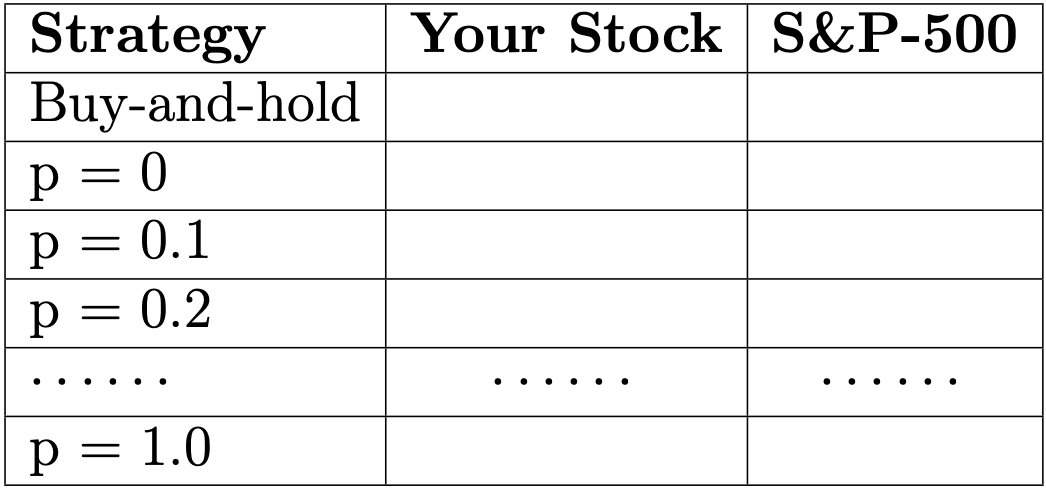
1) for what value of p, the results are comparable to buy-and- hold strategy. Is this value the same for your stock as it is for SP=500?
2) examine your table. Any patterns?


In [116]:
np.random.rand(10)

array([0.97672732, 0.66593957, 0.06993373, 0.4183111 , 0.05752528,
       0.56326071, 0.14340703, 0.81671288, 0.37550697, 0.63270461])

In [117]:
rng = np.random.default_rng(12345)
rng.random(3)

array([0.22733602, 0.31675834, 0.79736546])

In [118]:
def bh_oracle(weekly_returns, p):
    
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    wr = weekly_returns.Return.values
    pos = wr >= 1
    neg = np.logical_not(pos)
    t = rn < p
    f = np.logical_not(t)
    t_p = np.bitwise_and(t, pos)
    t_n = np.bitwise_and(t, neg)
    f_p = np.bitwise_and(f, pos)
    f_n = np.bitwise_and(f, neg)
    
    # collect cumulative returns for each category.
    # code not included in calculations included in comments for completeness
    # cumulative positive returns where oracle is telling truth
    t_p_return = np.cumprod(np.where(t_p, wr, 1))[-1]
    # no impact on returns from bad weeks when oracle tells truth
    # t_n_return = np.cumprod(np.where(t_n, 1, 1)) 
    # no benefit from positive returns when oracle lies
    # f_p_return = np.cumprod(np.where(f_p,1,1))
    # cumulative negative returns when oracle lies
    f_n_return = np.cumprod(np.where(f_n,wr,1))[-1]
    
    return np.round(100*t_p_return*f_n_return,2)

In [119]:
# buy and hold function that takes Begin_Price instead of Open
def buy_and_hold_v2(stock):
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Begin_Price'].values.astype(float))[0]

In [120]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [121]:
def oracle_stats(weekly_returns):
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df = pd.DataFrame(index = 
        ['B&H']+[f'p = {p}' for p in ps], 
        columns = ['GameStop'])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df.loc[f'B&H','GameStop'] = buy_and_hold_v2(weekly_returns)
    for p in ps:
        end_value = bh_oracle(weekly_returns,p)
        stats_df.loc[f'p = {np.round(p,1)}','GameStop'] = end_value
    return stats_df

In [122]:
oracle_stats(gme_weekly)

,GameStop
B&H,610.534591
p = 0.0,0.0
p = 0.1,0.01
p = 0.2,0.04
p = 0.3,0.39
p = 0.4,18.69
p = 0.5,2407.51
p = 0.6,8860.82
p = 0.7,295904.94
p = 0.8,1709185.7


##### Question 7: You are given a choice of an oracle. You choose the perfect oracle with p = 1. On the way home, you got so excited that you dropped your oracle (clumsy you!!!). The oracle is now very angry with you. It decides to take revenge by giving you wrong advice from time to time. Unlike the general statistical oracle, this ”angry” oracle decided to lie to you on the best and worst trading weeks. Specifically, let us consider the following three scenarios:

a) the angry oracle gave you wrong results for the best ten weeks. In other words, you missed the best ten weeks, and your overall profit will be lower.

b) the angry oracle gave you wrong results for the worst ten weeks days. In other words, you traded on the worst ten weeks, and your overall profit will be lower.

c) The angry oracle gave you wrong results for the best five weeks and for the worst five weeks. In other words, you missed the best five trading weeks, and you were invested during the worst five weeks.

Please answer the following questions:
1. for each of the scenarios above (a,b and c), compute the final amount that you will have for both your stock and ”spy”. Summarize your results in the following table:
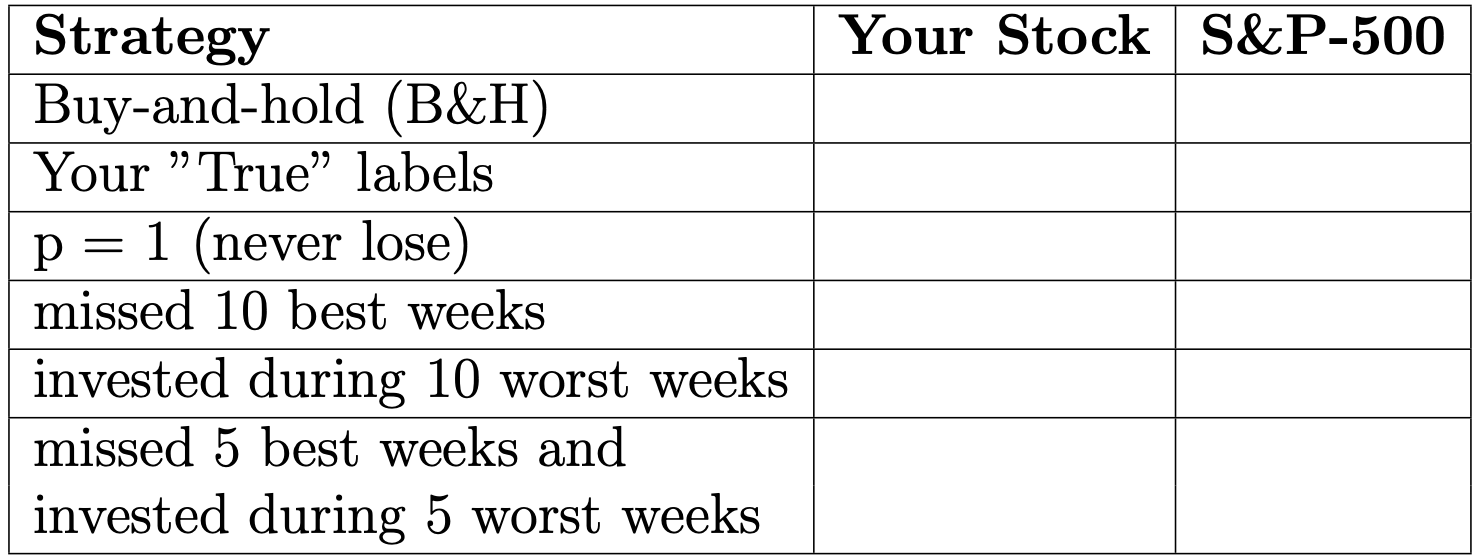

2. do you lose more by missing the best weeks or by being invested on the worst weeks?

3. for each part (a),(b), and (c), what are your estimates for the probability p if you used a statistical oracle instead of an angry one?

In [123]:
def angry_results(stock):
    returns = stock.Return.values
    miss_best_10 = np.cumprod()
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Open'].values.astype(float))[0]

In [124]:
def oracle_angry_stats(weekly_returns):
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df = pd.DataFrame(index = 
        ['B&H']+[f'p = {p}' for p in ps], 
        columns = ['GameStop'])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df.loc[f'B&H','GameStop'] = buy_and_hold_v2(weekly_returns)
    for p in ps:
        end_value = bh_oracle(weekly_returns,p)
        stats_df.loc[f'p = {np.round(p,1)}','GameStop'] = end_value
    return stats_df

In [125]:
def bh_oracle_angry(weekly_returns):
    
    wr = weekly_returns.Return.values
    cr_worst_ten = np.cumprod(np.sort(weekly_returns.Return.values)[:10])[-1]
    cr_best_ten = np.cumprod(np.sort(weekly_returns.Return.values)[-10:])[-1]
    cr_best_five = np.cumprod(np.sort(weekly_returns.Return.values)[-5:])[-1]
    cr_worst_five = np.cumprod(np.sort(weekly_returns.Return.values)[:5])[-1]
    
    never_lose = np.cumprod(np.where(wr>=1,wr,1))[-1]
    
    return pd.DataFrame({"GME": [np.round(100*never_lose,2),
                                 np.round(100*never_lose/cr_best_ten,2),
                                 np.round(100*never_lose*cr_worst_ten,2),
                                 np.round(100*never_lose*cr_worst_five/cr_best_five,2)
                                ]},index = ['Never Lose', 'Miss best ten', 
                                            'Invest worst 10', 'Miss best 5, invest worst 5'])
    

In [126]:
np.cumprod(np.sort(gme_weekly.Return.values)[:10])[-1]

0.01237526554730993

In [127]:
np.set_printoptions(precision = 2, suppress = True)

In [128]:
pd.options.display.float_format = '{:,.2f}'.format

In [129]:
bh_oracle_angry(gme_weekly)

,GME
Never Lose,"104,159,415.61"
Miss best ten,"220,749.03"
Invest worst 10,"1,289,000.43"
"Miss best 5, invest worst 5","50,428.61"


In [130]:
oracle_stats(gme_weekly)

,GameStop
B&H,610.53
p = 0.0,0.00
p = 0.1,0.01
p = 0.2,0.04
p = 0.3,0.39
p = 0.4,18.69
p = 0.5,"2,407.51"
p = 0.6,"8,860.82"
p = 0.7,"295,904.94"
p = 0.8,"1,709,185.70"


In [131]:
gme_weekly_return

,Year,Week_Number,mean_return,volatility
0,2017,1,-0.83,2.47
1,2017,2,-1.45,3.71
2,2017,3,0.93,1.42
3,2017,4,0.61,0.73
4,2017,5,0.36,1.02
...,...,...,...,...
258,2021,48,-2.83,4.05
259,2021,49,-1.44,6.24
260,2021,50,-0.09,8.97
261,2021,51,-0.56,1.67


In [132]:
def red_green(mus,sigmas,a,b):
    '''take return,vol df and assign labels based on line coeffs'''
    labels = []
    for mu, sigma in zip(mus,sigmas):
        if sigma>=(a + b*mu):
            labels.append('Red')
        else:
            labels.append('Green')
    return labels

In [133]:
r_g_labels = red_green(gme_weekly_return.mean_return,gme_weekly_return.volatility,0,25)

In [134]:
returns = trade_from_close_close(gme_wn_labs,this_wk_last_wk).Return.values
trade_green = 100*np.cumprod(np.where(np.array(r_g_labels)==['Green']*len(r_g_labels),returns,1))

In [135]:
trade_green[-1]

93650954.88928232

In [136]:
bh = buy_and_hold(gme)

In [137]:
cum_return = bh_oracle_angry(gme_weekly)

In [138]:
cum_return['GME']['Trade Green'] = cum_return

In [139]:
cum_return.loc['Trade Green'] = trade_green[-1]
cum_return.loc['B&H'] = bh


In [140]:
cum_return

,GME
Never Lose,"104,159,415.61"
Miss best ten,"220,749.03"
Invest worst 10,"1,289,000.43"
"Miss best 5, invest worst 5","50,428.61"
Trade Green,"93,650,954.89"
B&H,610.53


In [141]:
pd.concat([bh_oracle_angry(gme_weekly)])

,GME
Never Lose,"104,159,415.61"
Miss best ten,"220,749.03"
Invest worst 10,"1,289,000.43"
"Miss best 5, invest worst 5","50,428.61"


In [142]:
gme_wn_labs

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,WoM
0,2017,2017-01,1,3,Tuesday,6.36,5.16,0.00,1,0
1,2017,2017-01,1,4,Wednesday,6.39,5.27,0.02,1,0
2,2017,2017-01,1,5,Thursday,6.39,5.08,-0.04,1,0
3,2017,2017-01,1,6,Friday,6.29,4.99,-0.02,1,0
4,2017,2017-02,2,9,Monday,6.15,4.98,-0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,38.50,38.03,-0.01,12,0
1254,2021,2021-52,52,27,Monday,38.00,37.08,-0.03,12,0
1255,2021,2021-52,52,28,Tuesday,36.88,36.62,-0.01,12,0
1256,2021,2021-52,52,29,Wednesday,36.96,38.48,0.05,12,0


In [143]:
def oracle_stats(weekly_returns):
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df = pd.DataFrame(index = 
        ['B&H']+[f'p = {p}' for p in ps], 
        columns = ['GameStop'])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df.loc[f'B&H','GameStop'] = buy_and_hold_v2(weekly_returns)
    for p in ps:
        end_value = bh_oracle(weekly_returns,p)
        stats_df.loc[f'p = {np.round(p,1)}','GameStop'] = end_value
    return stats_df

In [144]:
def bh_oracle(weekly_returns, p):
    
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    wr = weekly_returns.Return.values
    pos = wr >= 1
    neg = np.logical_not(pos)
    t = rn < p
    f = np.logical_not(t)
    t_p = np.bitwise_and(t, pos)
    t_n = np.bitwise_and(t, neg)
    f_p = np.bitwise_and(f, pos)
    f_n = np.bitwise_and(f, neg)
    
    # collect cumulative returns for each category.
    # code not included in calculations included in comments for completeness
    # cumulative positive returns where oracle is telling truth
    t_p_return = np.cumprod(np.where(t_p, wr, 1))[-1]
    # no impact on returns from bad weeks when oracle tells truth
    # t_n_return = np.cumprod(np.where(t_n, 1, 1)) 
    # no benefit from positive returns when oracle lies
    # f_p_return = np.cumprod(np.where(f_p,1,1))
    # cumulative negative returns when oracle lies
    f_n_return = np.cumprod(np.where(f_n,wr,1))[-1]
    
    return np.round(100*t_p_return*f_n_return,2)

In [145]:
bh_oracle(gme_weekly,.5)

2407.51

In [146]:
from scipy import optimize

In [147]:
bh_oracle(gme_wn_labs,.1)

0.0

In [148]:
cum_return.loc['Miss best ten','GME']

220749.03

In [149]:
def find_p(p):
    return np.absolute(bh_oracle(gme_weekly,p)-cum_return.loc['Miss best ten','GME'])

In [150]:
minimum_miss_best_ten = optimize.fmin(find_p,1)

Optimization terminated successfully.
         Current function value: 31918.210000
         Iterations: 14
         Function evaluations: 32


In [151]:
np.round(minimum_miss_best_ten[0],5)

0.69375

In [152]:
def find_p(p):
    return np.absolute(bh_oracle(gme_weekly,p)-cum_return.loc['Invest worst 10','GME'])

In [153]:
minimum_hit_worst_ten = optimize.fmin(find_p,.7)

Optimization terminated successfully.
         Current function value: 11259.320000
         Iterations: 11
         Function evaluations: 27


In [154]:
np.round(minimum_hit_worst_ten[0],5)

0.77438

In [155]:
def find_p(p):
    return np.absolute(bh_oracle(gme_weekly,p)-cum_return.loc['Miss best 5, invest worst 5','GME'])

In [156]:
minimum_best_5_worst_5 = optimize.fmin(find_p,.7)

Optimization terminated successfully.
         Current function value: 1455.060000
         Iterations: 11
         Function evaluations: 29


In [157]:
np.round(minimum_best_5_worst_5[0],5)

0.665

In [158]:
def find_p(p):
    return np.absolute(bh_oracle(gme_weekly,p)-cum_return.loc['B&H','GME'])

In [159]:
minimum_bh = optimize.fmin(find_p,.7)

Optimization terminated successfully.
         Current function value: 27.425409
         Iterations: 17
         Function evaluations: 40


In [160]:
np.round(minimum_bh[0],5)

0.44625

### SPY

Questions:

1. If you buy a stock for just one week, what is the best and worst week (on the average) of the month to do so? Re- call that Weekly returns would always mean returns from ’Friday” close price to next Friday’s ”close” price.

2. What is the best and worst month to be invested in your stock and in S&P-500? Should you take a break from in- vesting in the summer months?

3. comparison of returns if you have an ”oracle” that can sta- tistically predict the future behavior of your stock price for next week



##### Question 1

##### 1. for each of the five years, compute the mean and standard deviation for the sets R, R− and R+ of weekly returns for your stock for each week of the month

First I need to generate new weekly labels so that the week with the first Friday of the month is Week 1 for each month, etc.

In [161]:
spy_week_number_labeling = spy.copy(deep=True)

In [162]:
spy_week_number_labeling

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.00,1
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.01,1
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.00,1
3,2017,2017-01,1,6,Friday,226.53,202.38,0.00,1
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.00,1
...,...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,468.75,458.00,0.01,12
1254,2021,2021-52,52,27,Monday,472.06,464.49,0.01,12
1255,2021,2021-52,52,28,Tuesday,477.72,464.11,-0.00,12
1256,2021,2021-52,52,29,Wednesday,476.98,464.70,0.00,12


idea: code each trading day with 

In [163]:
spy_week_number_labeling['Friday'] = np.where(spy.Weekday=='Friday',1,0)
# spy_week_number_labeling["Year_Month"] = spy_week_number_labeling['Year'].str +'-'+\
#                                          spy_week_number_labeling['Friday']       

In [164]:
spy_week_number_labeling["Friday"] = np.where(spy.Weekday == 'Friday',1,0) 
spy_week_number_labeling["Friday"]

0       0
1       0
2       0
3       1
4       0
       ..
1253    0
1254    0
1255    0
1256    0
1257    0
Name: Friday, Length: 1258, dtype: int64

In [165]:
spy_week_number_labeling

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.00,1,0
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.01,1,0
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.00,1,0
3,2017,2017-01,1,6,Friday,226.53,202.38,0.00,1,1
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,468.75,458.00,0.01,12,0
1254,2021,2021-52,52,27,Monday,472.06,464.49,0.01,12,0
1255,2021,2021-52,52,28,Tuesday,477.72,464.11,-0.00,12,0
1256,2021,2021-52,52,29,Wednesday,476.98,464.70,0.00,12,0


In [166]:
r = list(range(10))
np.where(np.cumsum(r)<=3,0,np.where(np.cumsum(r)<=10,1,np.where(np.cumsum(r)<=20,2,3)))

array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3])

In [167]:
spy_week_number_labeling.query('(Year==2017)&(Month==1)')

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.00,1,0
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.01,1,0
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.00,1,0
3,2017,2017-01,1,6,Friday,226.53,202.38,0.00,1,1
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.00,1,0
5,2017,2017-02,2,10,Tuesday,226.48,201.72,0.00,1,0
6,2017,2017-02,2,11,Wednesday,226.36,202.29,0.00,1,0
7,2017,2017-02,2,12,Thursday,226.50,201.78,-0.00,1,0
8,2017,2017-02,2,13,Friday,226.73,202.24,0.00,1,1
9,2017,2017-03,3,17,Tuesday,226.31,201.53,-0.00,1,0


In [168]:
np.max([1,2,3,0,0])

3

###### assinspynt continued

In [169]:
spy_has_friday = pd.DataFrame(columns = spy_week_number_labeling.columns)
for yw in spy_week_number_labeling.Year_Week.unique():
    if 'Friday' in spy_week_number_labeling.query(f'Year_Week == "{yw}" ').Weekday.values:
        spy_has_friday = pd.concat([spy_has_friday,spy_week_number_labeling.query(f'Year_Week == "{yw}"')])
spy_has_friday

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.00,1,0
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.01,1,0
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.00,1,0
3,2017,2017-01,1,6,Friday,226.53,202.38,0.00,1,1
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
1245,2021,2021-50,50,13,Monday,470.19,452.49,-0.01,12,0
1246,2021,2021-50,50,14,Tuesday,463.09,449.38,-0.01,12,0
1247,2021,2021-50,50,15,Wednesday,463.42,456.40,0.02,12,0
1248,2021,2021-50,50,16,Thursday,472.57,452.38,-0.01,12,0


In [170]:
spy_fri_numbered = pd.DataFrame(columns = spy_has_friday.columns)
for y in spy_has_friday.Year.unique():
    for m in spy_has_friday.query(f'Year == {y}').Month.unique():
        for wn_month, wn_absolute in enumerate(spy_has_friday.query(f'(Year == {y}) &\
                                            (Month == {m}) ').Week_Number.unique()):
            this_week = spy_has_friday.query(f'(Year == {y}) & ((Month == {m})\
                                & Week_Number == {wn_absolute})')
            this_week.Friday = wn_month+1
            
            spy_fri_numbered = pd.concat([spy_fri_numbered,this_week])                                 
            
spy_fri_numbered

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_25863/2608627572.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_week.Friday = wn_month+1


,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,Friday
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.00,1,1
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.01,1,1
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.00,1,1
3,2017,2017-01,1,6,Friday,226.53,202.38,0.00,1,1
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.00,1,2
...,...,...,...,...,...,...,...,...,...,...
1245,2021,2021-50,50,13,Monday,470.19,452.49,-0.01,12,3
1246,2021,2021-50,50,14,Tuesday,463.09,449.38,-0.01,12,3
1247,2021,2021-50,50,15,Wednesday,463.42,456.40,0.02,12,3
1248,2021,2021-50,50,16,Thursday,472.57,452.38,-0.01,12,3


In [171]:
spy_fri_numbered = spy_fri_numbered[[True if f in [1,2,3,4] 
                  else False for f in spy_fri_numbered.Friday.values]]

In [172]:
spy_fri_numbered.shape

(1073, 10)

1073 observations when including week on Friday.

In [173]:
spy_fri_numbered.groupby(by='Month',axis=0).agg('count').Year

Month
1     88
2     86
3     91
4     89
5     93
6     92
7     93
8     94
9     88
10    92
11    87
12    80
Name: Year, dtype: int64

In [174]:
spy_fri_numbered.groupby(by='Month',axis=0).agg('count').Year.std()

3.964807305493795

Since it looks like december may be consistently missing a week of data due to the holidays. I will try removing the 'must have friday' requirement

In [175]:
spy_wn_labs = spy.copy()
spy_wn_labs['WoM'] = 0 # create week of month column

In [176]:
spy_first_four = pd.DataFrame(columns = spy_wn_labs.columns)
for y in spy_wn_labs.Year.unique():
    for m in spy_wn_labs.query(f'Year == {y}').Month.unique():
        for wn_month, wn_absolute in enumerate(spy_wn_labs.query(f'(Year == {y}) &\
                                            (Month == {m}) ').Week_Number.unique()):
            this_week = spy_wn_labs.query(f'(Year == {y}) & ((Month == {m})\
                                & Week_Number == {wn_absolute})')
            this_week.WoM = wn_month+1
            
            spy_first_four = pd.concat([spy_first_four,this_week])
spy_first_four = spy_first_four[[True if f in [1,2,3,4] 
                  else False for f in spy_first_four.WoM.values]]                                 
            
spy_first_four

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_25863/4197741338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_week.WoM = wn_month+1


,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,WoM
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.00,1,1
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.01,1,1
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.00,1,1
3,2017,2017-01,1,6,Friday,226.53,202.38,0.00,1,1
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.00,1,2
...,...,...,...,...,...,...,...,...,...,...
1249,2021,2021-50,50,17,Friday,461.55,447.56,-0.01,12,3
1250,2021,2021-51,51,20,Monday,454.48,442.80,-0.01,12,4
1251,2021,2021-51,51,21,Tuesday,458.61,450.67,0.02,12,4
1252,2021,2021-51,51,22,Wednesday,462.79,455.17,0.01,12,4


In [177]:
spy_first_four.groupby(by='Month',axis=0).agg('count')

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,WoM
Month,,,,,,,,,
1,88,88,88,88,88,88,88,88,88
2,86,86,86,86,86,86,86,86,86
3,91,91,91,91,91,91,91,91,91
4,91,91,91,91,91,91,91,91,91
5,93,93,93,93,93,93,93,93,93
6,92,92,92,92,92,92,92,92,92
7,90,90,90,90,90,90,90,90,90
8,94,94,94,94,94,94,94,94,94
9,88,88,88,88,88,88,88,88,88


In [178]:
np.round(spy_first_four.groupby(by='Month',axis=0).agg('count').Year.std(),3)

2.558

In [179]:
np.round(spy_fri_numbered.groupby(by='Month',axis=0).agg('count').Year.std(),3)

3.965

After discarding the 'must have Friday' inclusion criterion for weeks, December now has closer to average number of days in the dataset and the standard deviation in counts of observations between months is now 2.558, compared to 3.965.

I believe that this observation justifies excluding the need for Friday as the inclusion criterion for the week, and so I will proceed with the "spy_first_four" DataFrame object for subsequent analysis.

##### Question 1:
1. for each of the five years, compute the mean and standard deviation for the sets R, R− and R+ of weekly returns for your stock for each week of the month.
2. summarize your results in the table as shown below (5 tables total).
<img src= './table_q1.png' />
3. are there more weeks with negative or non-negative returns?
4. does your stock lose more on a ”down” week than it gains on an ”up” week.
5. are these results the same weeks of the month?

In [180]:
def trade_from_open_close(stock):
    '''Return a dataframe with weekly return factors based on first day of week
    open and last day of week close'''
    
    stock_by_week = pd.DataFrame(
        columns=['Year','Year_Week',"Open","Adj Close", 'Return', 'WoM'])
    
    year_weeks = stock["Year_Week"].unique()
    
    for inx, yw in enumerate(year_weeks):
        this_week = stock[stock["Year_Week"]==yw]
        o = this_week.head(1)['Open'].values[0]
        ac = this_week.tail(1)['Adj Close'].values[0]
        r = 1+(ac-o)/o
        wom = this_week.head(1)['WoM'].values[0]
        y = this_week.tail(1)['Year'].values[0]
        stock_by_week.loc[inx,:] = [y,yw,o,ac,r,wom]
    return stock_by_week

In [181]:
year_weeks = spy["Year_Week"].unique()
year_weeks[2-1]

'2017-02'

###### procceeding with trade_from_open_close

In [182]:
weekly_returns = trade_from_open_close(spy_first_four)
# nested dictionary of year_num: {week_num: return}
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
wr_by_year[2017]

{1: [], 2: [], 3: [], 4: []}

In [183]:
weekly_returns

,Year,Year_Week,Open,Adj Close,Return,WoM
0,2017,2017-01,225.04,202.38,0.90,1
1,2017,2017-02,226.91,202.24,0.89,2
2,2017,2017-03,226.31,201.97,0.89,3
3,2017,2017-04,226.74,203.95,0.90,4
4,2017,2017-05,227.53,204.28,0.90,1
...,...,...,...,...,...,...
235,2021,2021-47,470.89,445.12,0.95,4
236,2021,2021-48,461.64,439.74,0.95,1
237,2021,2021-49,456.13,456.54,1.00,2
238,2021,2021-50,470.19,447.56,0.95,3


In [184]:
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
for yw in weekly_returns.iterrows():
    wr_by_year[yw[1]["Year"]][yw[1]["WoM"
    ]].append(yw[1]['Return'])


In [185]:
wr_dfs = {y: pd.DataFrame(columns =['mu(R)','sigma(R)','|R-|', 'mu(R-)', 'sigma(R-)'
                               , '|R+|', 'mu(R+)', 'sigma(R+)'], 
                       index = [1+w for w in range(0,4)],) for y in 
          spy_first_four.Year.unique()}
for y,df in wr_dfs.items():
    df.name = y # name dataframes according to year
    
for y, wrs in wr_by_year.items():
    for wk, rs in wrs.items():
        rs = np.array(rs)
        
        rs_pos = rs[rs>=1]; rs_neg = rs[rs<1]
        mu_r = np.round(np.mean(rs),3); sigma_r = np.round(np.std(rs),3)
        
        r_neg_count = np.shape(rs_neg)[0];
        mu_r_neg = np.round(np.mean(rs_neg),3)
        sigma_r_neg = np.round(np.std(rs_neg),3)
        
        r_pos_count = np.shape(rs_pos)[0]; mu_r_pos = np.round(np.mean(rs_pos),3)
        sigma_r_pos = np.round(np.std(rs_pos),3)
        
        wr_dfs[y].loc[wk] = {'mu(R)':mu_r, 'sigma(R)':sigma_r, 
            '|R-|':r_neg_count, 'mu(R-)':mu_r_neg, 'sigma(R-)':sigma_r_neg, 
            '|R+|':r_pos_count, 'mu(R+)':mu_r_pos, 'sigma(R+)':sigma_r_pos }

/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/williammohr/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [186]:
wr_dfs[2017]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.90,0.01,12.00,0.90,0.01,0.00,NaN,NaN
2,0.90,0.01,12.00,0.90,0.01,0.00,NaN,NaN
3,0.90,0.01,12.00,0.90,0.01,0.00,NaN,NaN
4,0.90,0.01,12.00,0.90,0.01,0.00,NaN,NaN


In [187]:
wr_dfs[2018]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.91,0.02,12.00,0.91,0.02,0.00,NaN,NaN
2,0.92,0.02,12.00,0.92,0.02,0.00,NaN,NaN
3,0.91,0.02,12.00,0.91,0.02,0.00,NaN,NaN
4,0.91,0.02,12.00,0.91,0.02,0.00,NaN,NaN


In [188]:
wr_dfs[2019]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.94,0.01,12.00,0.94,0.01,0.00,NaN,NaN
2,0.94,0.01,12.00,0.94,0.01,0.00,NaN,NaN
3,0.94,0.01,12.00,0.94,0.01,0.00,NaN,NaN
4,0.93,0.01,12.00,0.93,0.01,0.00,NaN,NaN


In [189]:
wr_dfs[2020]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.96,0.02,11.00,0.96,0.02,1.00,1.01,0.00
2,0.96,0.03,11.00,0.95,0.02,1.00,1.02,0.00
3,0.95,0.02,12.00,0.95,0.02,0.00,NaN,NaN
4,0.96,0.04,11.00,0.95,0.03,1.00,1.05,0.00


In [190]:
wr_dfs[2021]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.97,0.01,12.00,0.97,0.01,0.00,NaN,NaN
2,0.97,0.01,11.00,0.97,0.01,1.00,1.00,0.00
3,0.96,0.01,12.00,0.96,0.01,0.00,NaN,NaN
4,0.97,0.02,11.00,0.97,0.02,1.00,1.01,0.00


###### proceeding with trade_from_close_close

In [191]:
def trade_from_close_close(stock,sd):
    '''Args: stock: dataframe of stock data | sd: dictionary of staggered weeks,
    i.e. {2017-02:2017-01, ... 2021-52:2021-51} for gettin prior week adjusted
    close Return a dataframe with weekly return factors based on first day of week
    open and last day of week close.'''
    
    stock_by_week = pd.DataFrame(
        columns=['Year','Year_Week',"Begin_Price","Adj Close", 'Return', 'WoM'])
    
    year_weeks = stock["Year_Week"].unique()
    
    for inx, yw in enumerate(year_weeks):
        this_week = stock[stock["Year_Week"]==yw]
        try:
            begin_price = stock[stock["Year_Week"]==sd[yw]].\
            tail(1)['Adj Close'].values[0]
        except (IndexError,KeyError): 
            begin_price = this_week.head(1)['Open'].values[0]
        close_price = this_week.tail(1)['Adj Close'].values[0]
        r = close_price/begin_price
        wom = this_week.head(1)['WoM'].values[0]
        y = this_week.tail(1)['Year'].values[0]
        stock_by_week.loc[inx,:] = [y,yw,begin_price,close_price,r,wom]
    return stock_by_week

In [192]:
# correspond year_week with year_week that determines the begin price
this_wk_last_wk = dict(zip(spy.Year_Week.unique()[1:], 
                           spy.Year_Week.unique()[:-1]))

In [193]:
weekly_returns = trade_from_close_close(spy_first_four,this_wk_last_wk)
# nested dictionary of year_num: {week_num: return}
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
wr_by_year[2017]

{1: [], 2: [], 3: [], 4: []}

In [194]:
weekly_returns

,Year,Year_Week,Begin_Price,Adj Close,Return,WoM
0,2017,2017-01,225.04,202.38,0.90,1
1,2017,2017-02,202.38,202.24,1.00,2
2,2017,2017-03,202.24,201.97,1.00,3
3,2017,2017-04,201.97,203.95,1.01,4
4,2017,2017-05,203.95,204.28,1.00,1
...,...,...,...,...,...,...
235,2021,2021-47,454.74,445.12,0.98,4
236,2021,2021-48,445.12,439.74,0.99,1
237,2021,2021-49,439.74,456.54,1.04,2
238,2021,2021-50,456.54,447.56,0.98,3


In [195]:
wr_by_year = {y:{1:[],2:[],3:[],4:[]} for y in weekly_returns.Year.values}
for yw in weekly_returns.iterrows():
    wr_by_year[yw[1]["Year"]][yw[1]["WoM"
    ]].append(yw[1]['Return'])


In [196]:
wr_dfs = {y: pd.DataFrame(columns =['mu(R)','sigma(R)','|R-|', 'mu(R-)', 'sigma(R-)'
                               , '|R+|', 'mu(R+)', 'sigma(R+)'], 
                       index = [1+w for w in range(0,4)],) for y in 
          spy_first_four.Year.unique()}
for y,df in wr_dfs.items():
    df.name = y # name dataframes according to year
    
for y, wrs in wr_by_year.items():
    for wk, rs in wrs.items():
        rs = np.array(rs)
        
        rs_pos = rs[rs>=1]; rs_neg = rs[rs<1]
        mu_r = np.round(np.mean(rs),3); sigma_r = np.round(np.std(rs),3)
        
        r_neg_count = np.shape(rs_neg)[0];
        mu_r_neg = np.round(np.mean(rs_neg),3)
        sigma_r_neg = np.round(np.std(rs_neg),3)
        
        r_pos_count = np.shape(rs_pos)[0]; mu_r_pos = np.round(np.mean(rs_pos),3)
        sigma_r_pos = np.round(np.std(rs_pos),3)
        
        wr_dfs[y].loc[wk] = {'mu(R)':mu_r, 'sigma(R)':sigma_r, 
            '|R-|':r_neg_count, 'mu(R-)':mu_r_neg, 'sigma(R-)':sigma_r_neg, 
            '|R+|':r_pos_count, 'mu(R+)':mu_r_pos, 'sigma(R+)':sigma_r_pos }

In [197]:
wr_dfs[2017]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.97,0.05,4.00,0.90,0.01,8.00,1.01,0.01
2,1.00,0.01,8.00,0.99,0.00,4.00,1.01,0.01
3,1.00,0.01,4.00,1.00,0.00,8.00,1.01,0.01
4,1.00,0.01,1.00,0.99,0.00,11.00,1.01,0.01


In [198]:
wr_dfs[2018]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.96,0.05,9.00,0.94,0.04,3.00,1.01,0.01
2,1.00,0.03,4.00,0.97,0.02,8.00,1.02,0.01
3,1.00,0.03,4.00,0.97,0.03,8.00,1.01,0.01
4,0.99,0.03,6.00,0.97,0.02,6.00,1.01,0.01


In [199]:
wr_dfs[2019]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.98,0.03,7.00,0.96,0.02,5.00,1.01,0.01
2,1.00,0.01,3.00,0.98,0.01,9.00,1.01,0.01
3,1.01,0.01,5.00,0.99,0.00,7.00,1.02,0.01
4,1.00,0.01,7.00,0.99,0.00,5.00,1.01,0.00


In [200]:
wr_dfs[2020]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,0.99,0.03,7.00,0.98,0.02,5.00,1.02,0.01
2,1.01,0.05,4.00,0.96,0.03,8.00,1.03,0.04
3,0.99,0.04,5.00,0.96,0.05,7.00,1.01,0.01
4,1.00,0.05,8.00,0.98,0.04,4.00,1.05,0.03


In [203]:
wr_dfs[2021]

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
1,1.00,0.02,6.00,0.98,0.01,6.00,1.02,0.01
2,1.01,0.02,4.00,0.99,0.01,8.00,1.02,0.01
3,1.00,0.01,8.00,0.99,0.01,4.00,1.01,0.01
4,1.00,0.02,4.00,0.98,0.01,8.00,1.02,0.01


In [204]:
net_pos = 0
for y in [2017,2018,2019,2020,2021]:
    net_pos += (sum(wr_dfs[y]['|R+|'].values)-sum(wr_dfs[y]['|R-|'].values))

In [205]:
net_pos

24.0

In [206]:
positive_negative_balance = 0
for y in [2017,2018,2019,2020,2021]:
    positive_negative_balance += (sum(wr_dfs[y]['mu(R-)'].values-1)+sum(wr_dfs[y]['mu(R+)'].values)-1)

In [207]:
positive_negative_balance

14.795

In [208]:
14.795/20

0.73975

##### Question 2: Examine your 5 tables.
1. Are there any patterns across weeks in a month?
2. Are there any patterns across different years for the week in a month?
3. What are the best and worst weeks of the month to be invested for each year?
4. do these weeks change from year to year for your stock?

##### Question 3: Compute the aggregate table across all 5 years, one table for both your stock and one table for S&P-500 (using data for ”spy”).

1. What are the best and worst weeks of the month for each?
2. are these weeks the same for your stock as they are for S&P-500?
3. in 5 years, you have about 250 weeks. If weekly returns were normally distributed with mean µ and standard deviation σ, then 5% of these weeks will have returns r with r < µ − 2σ or r > µ + 2σ. For how many weeks do you have with weekly returns outside of µ±2σ range (for your stock and for S&P-500)? Is it consistent with the normality of returns?

In [209]:
def sig(a_series):
    return np.std(a_series)

def mu(a_series):
    return np.round(np.mean(a_series),3)

def count_pos(a_series):
    a = np.array(a_series.values)
    return a[a>=1].shape[0]

def count_neg(a_series):
    a = np.array(a_series.values)
    return a[a<1].shape[0]

def mu_pos(a_series):
    a = np.array(a_series.values)
    a_pos = a[a>=1]
    return np.round(np.mean(a_pos),3)

def mu_neg(a_series):
    a = np.array(a_series.values)
    a_neg = a[a<1]
    return np.round(np.mean(a_neg),3)

def sig_pos(a_series):
    a = np.array(a_series.values)
    a_pos = a[a>=1]
    return np.round(np.std(a_pos),3)

def sig_neg(a_series):
    a = np.array(a_series.values)
    a_neg = a[a<1]
    return np.round(np.std(a_neg),3)

In [210]:
spy_first_four_agg = trade_from_close_close(spy_first_four,this_wk_last_wk)
gb_WoM = spy_first_four_agg[['Return','WoM']].groupby(by='WoM')['Return']
WoM_stats_all_years = pd.DataFrame({'mu(R)':gb_WoM.apply(mu),
 'sigma(R)':gb_WoM.apply(sig),
 '|R-|':gb_WoM.apply(count_neg), 
 'mu(R-)':gb_WoM.apply(mu_neg), 
 'sigma(R-)':gb_WoM.apply(sig_neg), 
 '|R+|':gb_WoM.apply(count_pos), 
 'mu(R+)':gb_WoM.apply(mu_pos), 
 'sigma(R+)':gb_WoM.apply(sig_pos)
})

In [211]:
WoM_stats_all_years

,mu(R),sigma(R),|R-|,mu(R-),sigma(R-),|R+|,mu(R+),sigma(R+)
WoM,,,,,,,,
1,0.98,0.04,33,0.95,0.04,27,1.01,0.01
2,1.00,0.03,23,0.98,0.02,37,1.02,0.02
3,1.00,0.03,26,0.98,0.03,34,1.01,0.01
4,1.00,0.03,26,0.98,0.02,34,1.02,0.02


1) The best week of the month for GameStop is week 4 and the worst week of the month is week 1.

2) refer to answers document

In [212]:
wr_vals = trade_from_close_close(spy_first_four,this_wk_last_wk)['Return'].values
wr_std = np.std(wr_vals)
wr_mu = np.mean(wr_vals)
sum((wr_vals-wr_mu)/wr_std > 1.96)

2

In [213]:
.05*len(wr_vals)

12.0

3) There are only two weeks with absolute returns differences from the mean greater than or equal to 1.96.  There should be around 12, so this substantial differential indicates that the distribution has fatter tails than would be expected from a normal distribution, with a few weeks accounting for an outsized portion of the variance.

#### Questions 4-7

For the following questions, suppose that you have an ”oracle”. This oracle knows all ”True” labels for any stock for any week in the future. In particular, this oracle could tell you (statistically, of course) whether the price of any stock would increase or decrease the following week (Friday-to-Friday). Let p be the probability that your oracle predicts the ”True” label correctly for each day. Assume that you have no transaction costs.

To implement such an oracle, we do the following: given probability p, generate a random number r in interval [0, 1]. If r ≤ p then Oracle gives the ”True” label, and if r > p then Oracle gives the opposite of the ”True” label. If p = 1, then Oracle gives you the correct ”True” label for each week. Therefore, you will never lose if you ”week trade” according to these labels. On the other extreme, if p = 0, then Oracle would tell you the opposite of ”True” labels. In this case, you will lose on every week that you are invested. For the general case 0 < p < 1, the oracle can only predict ”True” labels statistically with probability p of predicting the label correctly. You start with \\$100 on the first trading day of year 1 to trade your stock and another \\$100 to trade ”spy”. We ignore transaction costs and any taxes.

##### Question 4: Let p = 1, and you listen to the oracle and follow its advice. How much money will you have on the last trading week of year 5:
1. your stock?
2. S&P-500 stock?
3. take the last two digits of your BU id and add this number to \\$100. Assume that this is the desired amount. For example, if your BU id ends on 47, your desired amount is \\$100 + \\$47 = \\$147. If p = 1, then how many weeks would it take for your stock and for S&P-500 to get to that amount?

In [214]:
spy_weekly = trade_from_close_close(spy_wn_labs,this_wk_last_wk)

In [215]:
returns = spy_weekly.Return
trade_p_1 = np.round(100*np.cumprod(np.where(returns>1,
                             returns.values.astype(float),1)),2)

In [216]:
trade_p_1[-1]

1291.28

1) SP500 worth at end of 5 yrs: 1291.28

In [217]:
np.argmax(trade_p_1>134)

53

3) it will take 54 weeks for my GameStop portfolio to be worth at least $134.

##### Question 5: Consider ”buy-and-hold” strategy: you buy on the first trading day and sell on the last day. So you do not listen to your oracle at all. As before, assume that you start with \\$100 for both your stock and ”spy”.
1. How much money will you have on the last trading day ofyear 5?
2. How do these results compare with results obtained in question 4?
3. Summer Vacation for your stock? You implement ”buyand-hold” except that you sell on the last trading day in May and buy on the last trading day in August. You do this every year. In other words, your stock takes a long 3-month summer vacation in each of 5 years. What are the final amounts for your stock and for S&P-500? Is this a good strategy? Summarize your findings in the table:
4. Monthly Vacation for your stock? For each month, you implement ”buy-and-hold” except that you sell on the first trading day of that month and buy on the last trading day of that month. You do this for that month every year. In other words, your stock takes a montly vacation. What are the final amounts for your stock and for S&P-500 for such a strategy? Summarize your findings in the table:
<img src='./monthly_vacation_table_template.png' alt = 'monthly_vacation_table_template'>
What is the best and worst month to vacation for your stock and for S&P-500?

In [218]:
def trade_from_close_close_holiday(stock,sd):
    '''Args: stock: dataframe of stock data | sd: dictionary of staggered weeks,
    i.e. {2017-02:2017-01, ... 2021-52:2021-51} for getting prior week adjusted
    close 
    Return a dataframe with weekly return factors based on first day of week
    open and last day of week close.  Includes Month column'''
    
    stock_by_week = pd.DataFrame(
        columns=['Year','Year_Week',"Begin_Price","Adj Close", 'Return', 'WoM',
                'Month'])
    
    year_weeks = stock["Year_Week"].unique()
    
    for inx,yw in enumerate(year_weeks):
        this_week = stock[stock["Year_Week"]==yw]
        try:
            begin_price = stock[stock["Year_Week"]==sd[yw]].\
            tail(1)['Adj Close'].values[0]
        except (IndexError,KeyError): 
            begin_price = this_week.head(1)['Open'].values[0]
        close_price = this_week.tail(1)['Adj Close'].values[0]
        r = close_price/begin_price
        wom = this_week.head(1)['WoM'].values[0]
        y = this_week.tail(1)['Year'].values[0]
        m = this_week.tail(1)['Month'].values[0]
        stock_by_week.loc[inx,:] = [y,yw,begin_price,close_price,r,wom,m]
    return stock_by_week

In [219]:
spy_returns = trade_from_close_close_holiday(spy_wn_labs,this_wk_last_wk)

In [220]:
def bh_holiday(weekly_returns, holiday_month):
    return np.round(100*np.cumprod(np.where(weekly_returns.Month.values != holiday_month,
                             weekly_returns.Return.values.astype(float),1)),2)

In [221]:
def holiday_stats(weekly_returns):
    months = range(0,13)
    stats_df = pd.DataFrame(index = 
        [f'B&H w/o month {m}' if m != 0 else 'B&H' for m in months], 
        columns = ['SP500'])
    for m in months:
        end_value = bh_holiday(weekly_returns,m)[-1]
        if m != 0:
            stats_df.loc[f'B&H w/o month {m}','SP500'] = end_value
        else:
            stats_df.loc[f'B&H','SP500'] = end_value
    return stats_df

In [222]:
spy_returns

,Year,Year_Week,Begin_Price,Adj Close,Return,WoM,Month
0,2017,2017-01,225.04,202.38,0.90,0,1
1,2017,2017-02,202.38,202.24,1.00,0,1
2,2017,2017-03,202.24,201.97,1.00,0,1
3,2017,2017-04,201.97,203.95,1.01,0,1
4,2017,2017-05,203.95,204.28,1.00,0,2
...,...,...,...,...,...,...,...
258,2021,2021-48,445.12,439.74,0.99,0,12
259,2021,2021-49,439.74,456.54,1.04,0,12
260,2021,2021-50,456.54,447.56,0.98,0,12
261,2021,2021-51,447.56,458.00,1.02,0,12


In [223]:
holiday_stats(spy_returns)

,SP500
B&H,205.92
B&H w/o month 1,201.08
B&H w/o month 2,209.02
B&H w/o month 3,234.36
B&H w/o month 4,164.69
B&H w/o month 5,195.61
B&H w/o month 6,189.56
B&H w/o month 7,168.60
B&H w/o month 8,188.79
B&H w/o month 9,209.85


In [225]:
def bh_summer_holiday(weekly_returns, months):
    return np.round(100*np.cumprod(np.where(~np.isin(weekly_returns.Month, months),
                             weekly_returns.Return.astype(float),1)),2)

In [226]:
def summer_holiday_stats(weekly_returns):
    months = [6,7,8]
    stats_df = pd.DataFrame(index = 
        ['B&H','B&H_Summer_Vacay'], 
        columns = ['SP500'])
    end_value = bh_summer_holiday(weekly_returns,months)[-1]
    stats_df.loc['B&H_Summer_Vacay','SP500'] = end_value

    stats_df.loc[f'B&H','SP500'] = bh_holiday(weekly_returns,0)[-1]
    return stats_df

In [227]:
spy_returns

,Year,Year_Week,Begin_Price,Adj Close,Return,WoM,Month
0,2017,2017-01,225.04,202.38,0.90,0,1
1,2017,2017-02,202.38,202.24,1.00,0,1
2,2017,2017-03,202.24,201.97,1.00,0,1
3,2017,2017-04,201.97,203.95,1.01,0,1
4,2017,2017-05,203.95,204.28,1.00,0,2
...,...,...,...,...,...,...,...
258,2021,2021-48,445.12,439.74,0.99,0,12
259,2021,2021-49,439.74,456.54,1.04,0,12
260,2021,2021-50,456.54,447.56,0.98,0,12
261,2021,2021-51,447.56,458.00,1.02,0,12


In [228]:
summer_holiday_stats(spy_returns)

,SP500
B&H,205.92
B&H_Summer_Vacay,142.29


##### Question 6: Compute and compare the final value of your portfolio for buy-and-hold strategy with Oracle for different values of p = {0, 0.1, 0.2, . . . , 1}. Summarize the results in the table below. As before, assume that you start with $100 for both your stock and ”spy”
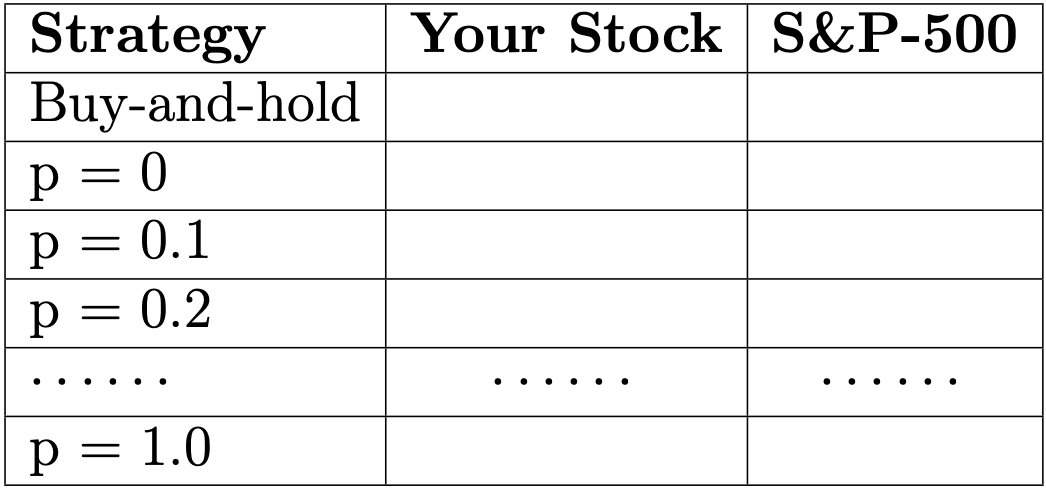
1) for what value of p, the results are comparable to buy-and- hold strategy. Is this value the same for your stock as it is for SP=500?
2) examine your table. Any patterns?


In [229]:
np.random.rand(10)

array([0.4 , 0.96, 0.04, 0.26, 0.67, 0.1 , 0.34, 0.95, 0.56, 0.84])

In [230]:
rng = np.random.default_rng(12345)
rng.random(3)

array([0.23, 0.32, 0.8 ])

In [231]:
def bh_oracle(weekly_returns, p):
    
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    wr = weekly_returns.Return.values
    pos = wr >= 1
    neg = np.logical_not(pos)
    t = rn < p
    f = np.logical_not(t)
    t_p = np.bitwise_and(t, pos)
    t_n = np.bitwise_and(t, neg)
    f_p = np.bitwise_and(f, pos)
    f_n = np.bitwise_and(f, neg)
    
    # collect cumulative returns for each category.
    # code not included in calculations included in comments for completeness
    # cumulative positive returns where oracle is telling truth
    t_p_return = np.cumprod(np.where(t_p, wr, 1))[-1]
    # no impact on returns from bad weeks when oracle tells truth
    # t_n_return = np.cumprod(np.where(t_n, 1, 1)) 
    # no benefit from positive returns when oracle lies
    # f_p_return = np.cumprod(np.where(f_p,1,1))
    # cumulative negative returns when oracle lies
    f_n_return = np.cumprod(np.where(f_n,wr,1))[-1]
    
    return np.round(100*t_p_return*f_n_return,2)

In [232]:
# buy and hold function that takes Begin_Price instead of Open
def buy_and_hold_v2(stock):
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Begin_Price'].values.astype(float))[0]

In [233]:
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [234]:
def oracle_stats(weekly_returns):
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df = pd.DataFrame(index = 
        ['B&H']+[f'p = {p}' for p in ps], 
        columns = ['SP500'])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df.loc[f'B&H','SP500'] = buy_and_hold_v2(weekly_returns)
    for p in ps:
        end_value = bh_oracle(weekly_returns,p)
        stats_df.loc[f'p = {np.round(p,1)}','SP500'] = end_value
    return stats_df

In [235]:
oracle_stats(spy_weekly)

,SP500
B&H,205.92
p = 0.0,15.95
p = 0.1,24.38
p = 0.2,35.36
p = 0.3,67.52
p = 0.4,96.82
p = 0.5,163.78
p = 0.6,208.03
p = 0.7,299.29
p = 0.8,499.29


##### Question 7: You are given a choice of an oracle. You choose the perfect oracle with p = 1. On the way home, you got so excited that you dropped your oracle (clumsy you!!!). The oracle is now very angry with you. It decides to take revenge by giving you wrong advice from time to time. Unlike the general statistical oracle, this ”angry” oracle decided to lie to you on the best and worst trading weeks. Specifically, let us consider the following three scenarios:

a) the angry oracle gave you wrong results for the best ten weeks. In other words, you missed the best ten weeks, and your overall profit will be lower.

b) the angry oracle gave you wrong results for the worst ten weeks days. In other words, you traded on the worst ten weeks, and your overall profit will be lower.

c) The angry oracle gave you wrong results for the best five weeks and for the worst five weeks. In other words, you missed the best five trading weeks, and you were invested during the worst five weeks.

Please answer the following questions:
1. for each of the scenarios above (a,b and c), compute the final amount that you will have for both your stock and ”spy”. Summarize your results in the following table:
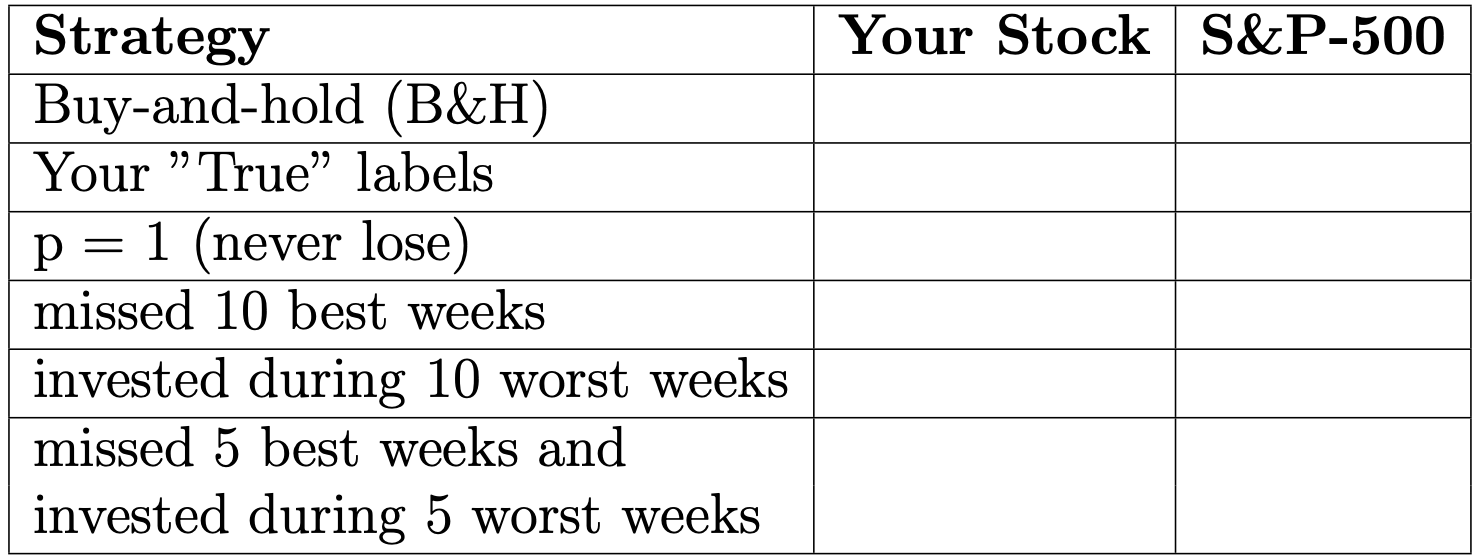

2. do you lose more by missing the best weeks or by being invested on the worst weeks?

3. for each part (a),(b), and (c), what are your estimates for the probability p if you used a statistical oracle instead of an angry one?

In [236]:
def angry_results(stock):
    returns = stock.Return.values
    miss_best_10 = np.cumprod()
    return list(100*(stock.tail(1)["Adj Close"].values.astype(float))/\
            stock.head(1)['Open'].values.astype(float))[0]

In [237]:
def oracle_angry_stats(weekly_returns):
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df = pd.DataFrame(index = 
        ['B&H']+[f'p = {p}' for p in ps], 
        columns = ['GameStop'])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df.loc[f'B&H','GameStop'] = buy_and_hold_v2(weekly_returns)
    for p in ps:
        end_value = bh_oracle(weekly_returns,p)
        stats_df.loc[f'p = {np.round(p,1)}','GameStop'] = end_value
    return stats_df

In [238]:
def bh_oracle_angry(weekly_returns):
    
    wr = weekly_returns.Return.values
    cr_worst_ten = np.cumprod(np.sort(weekly_returns.Return.values)[:10])[-1]
    cr_best_ten = np.cumprod(np.sort(weekly_returns.Return.values)[-10:])[-1]
    cr_best_five = np.cumprod(np.sort(weekly_returns.Return.values)[-5:])[-1]
    cr_worst_five = np.cumprod(np.sort(weekly_returns.Return.values)[:5])[-1]
    
    never_lose = np.cumprod(np.where(wr>=1,wr,1))[-1]
    
    return pd.DataFrame({"spy": [np.round(100*never_lose,2),
                                 np.round(100*never_lose/cr_best_ten,2),
                                 np.round(100*never_lose*cr_worst_ten,2),
                                 np.round(100*never_lose*cr_worst_five/cr_best_five,2)
                                ]},index = ['Never Lose', 'Miss best ten', 
                                            'Invest worst 10', 'Miss best 5, invest worst 5'])
    

In [239]:
np.cumprod(np.sort(spy_weekly.Return.values)[:10])[-1]

0.44158862631015233

In [240]:
np.set_printoptions(precision = 2, suppress = True)

In [241]:
pd.options.display.float_format = '{:,.2f}'.format

In [242]:
bh_oracle_angry(spy_weekly)

,spy
Never Lose,"1,291.28"
Miss best ten,714.08
Invest worst 10,570.21
"Miss best 5, invest worst 5",506.93


In [243]:
oracle_stats(spy_weekly)

,SP500
B&H,205.92
p = 0.0,15.95
p = 0.1,24.38
p = 0.2,35.36
p = 0.3,67.52
p = 0.4,96.82
p = 0.5,163.78
p = 0.6,208.03
p = 0.7,299.29
p = 0.8,499.29


In [244]:
spy_weekly_return

,Year,Week_Number,mean_return,volatility
0,2017,1,0.22,0.31
1,2017,2,-0.01,0.28
2,2017,3,-0.03,0.38
3,2017,4,0.20,0.52
4,2017,5,0.03,0.46
...,...,...,...,...
258,2021,48,-0.23,1.53
259,2021,49,0.76,1.03
260,2021,50,-0.39,1.10
261,2021,51,0.58,1.20


In [245]:
def red_green(mus,sigmas,a,b):
    '''take return,vol df and assign labels based on line coeffs'''
    labels = []
    for mu, sigma in zip(mus,sigmas):
        if sigma>=(a + b*mu):
            labels.append('Red')
        else:
            labels.append('Green')
    return labels

In [246]:
r_g_labels = red_green(spy_weekly_return.mean_return,spy_weekly_return.volatility,0,25)

In [247]:
returns = trade_from_close_close(spy_wn_labs,this_wk_last_wk).Return.values
trade_green = 100*np.cumprod(np.where(np.array(r_g_labels)==['Green']*len(r_g_labels),returns,1))

In [248]:
trade_green[-1]

1153.2805652999568

In [249]:
bh = buy_and_hold(spy)

In [250]:
cum_return = bh_oracle_angry(spy_weekly)

In [251]:
cum_return['spy']['Trade Green'] = cum_return

In [252]:
cum_return.loc['Trade Green'] = trade_green[-1]
cum_return.loc['B&H'] = bh


In [253]:
cum_return

,spy
Never Lose,"1,291.28"
Miss best ten,714.08
Invest worst 10,570.21
"Miss best 5, invest worst 5",506.93
Trade Green,"1,153.28"
B&H,205.92


In [254]:
pd.concat([bh_oracle_angry(spy_weekly)])

,spy
Never Lose,"1,291.28"
Miss best ten,714.08
Invest worst 10,570.21
"Miss best 5, invest worst 5",506.93


In [255]:
spy_wn_labs

,Year,Year_Week,Week_Number,Day,Weekday,Open,Adj Close,Return,Month,WoM
0,2017,2017-01,1,3,Tuesday,225.04,200.63,0.00,1,0
1,2017,2017-01,1,4,Wednesday,225.62,201.82,0.01,1,0
2,2017,2017-01,1,5,Thursday,226.27,201.66,-0.00,1,0
3,2017,2017-01,1,6,Friday,226.53,202.38,0.00,1,0
4,2017,2017-02,2,9,Monday,226.91,201.72,-0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
1253,2021,2021-51,51,23,Thursday,468.75,458.00,0.01,12,0
1254,2021,2021-52,52,27,Monday,472.06,464.49,0.01,12,0
1255,2021,2021-52,52,28,Tuesday,477.72,464.11,-0.00,12,0
1256,2021,2021-52,52,29,Wednesday,476.98,464.70,0.00,12,0


In [256]:
def oracle_stats(weekly_returns):
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df = pd.DataFrame(index = 
        ['B&H']+[f'p = {p}' for p in ps], 
        columns = ['GameStop'])
    ps = np.round(np.linspace(0,1,11),1)
    stats_df.loc[f'B&H','GameStop'] = buy_and_hold_v2(weekly_returns)
    for p in ps:
        end_value = bh_oracle(weekly_returns,p)
        stats_df.loc[f'p = {np.round(p,1)}','GameStop'] = end_value
    return stats_df

In [257]:
def bh_oracle(weekly_returns, p):
    
    rng = np.random.default_rng(12345)
    rn = rng.random(weekly_returns.shape[0])
    wr = weekly_returns.Return.values
    pos = wr >= 1
    neg = np.logical_not(pos)
    t = rn < p
    f = np.logical_not(t)
    t_p = np.bitwise_and(t, pos)
    t_n = np.bitwise_and(t, neg)
    f_p = np.bitwise_and(f, pos)
    f_n = np.bitwise_and(f, neg)
    
    # collect cumulative returns for each category.
    # code not included in calculations included in comments for completeness
    # cumulative positive returns where oracle is telling truth
    t_p_return = np.cumprod(np.where(t_p, wr, 1))[-1]
    # no impact on returns from bad weeks when oracle tells truth
    # t_n_return = np.cumprod(np.where(t_n, 1, 1)) 
    # no benefit from positive returns when oracle lies
    # f_p_return = np.cumprod(np.where(f_p,1,1))
    # cumulative negative returns when oracle lies
    f_n_return = np.cumprod(np.where(f_n,wr,1))[-1]
    
    return np.round(100*t_p_return*f_n_return,2)

In [258]:
bh_oracle(spy_weekly,.5)

163.78

In [259]:
from scipy import optimize

In [260]:
bh_oracle(spy_wn_labs,.1)

0.0

In [261]:
cum_return.loc['Miss best ten','spy']

714.08

In [262]:
def find_p(p):
    return np.absolute(bh_oracle(spy_weekly,p)-cum_return.loc['Miss best ten','spy'])

In [263]:
minimum_miss_best_ten = optimize.fmin(find_p,1)

Optimization terminated successfully.
         Current function value: 0.430000
         Iterations: 13
         Function evaluations: 29


In [264]:
np.round(minimum_miss_best_ten[0],5)

0.88125

In [265]:
def find_p(p):
    return np.absolute(bh_oracle(spy_weekly,p)-cum_return.loc['Invest worst 10','spy'])

In [266]:
minimum_hit_worst_ten = optimize.fmin(find_p,.7)

Optimization terminated successfully.
         Current function value: 1.490000
         Iterations: 13
         Function evaluations: 30


In [267]:
np.round(minimum_hit_worst_ten[0],5)

0.86844

In [268]:
def find_p(p):
    return np.absolute(bh_oracle(spy_weekly,p)-cum_return.loc['Miss best 5, invest worst 5','spy'])

In [269]:
minimum_best_5_worst_5 = optimize.fmin(find_p,.7)

Optimization terminated successfully.
         Current function value: 1.190000
         Iterations: 12
         Function evaluations: 29


In [270]:
np.round(minimum_best_5_worst_5[0],5)

0.81813

In [271]:
def find_p(p):
    return np.absolute(bh_oracle(spy_weekly,p)-cum_return.loc['B&H','spy'])

In [272]:
minimum_bh = optimize.fmin(find_p,.7)

Optimization terminated successfully.
         Current function value: 1.093391
         Iterations: 13
         Function evaluations: 35


In [273]:
np.round(minimum_bh[0],5)

0.56